In [8]:
!pip install mediapipe opencv-python

In [9]:
from pydub import AudioSegment
from pydub.playback import play

In [10]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [26]:
# VIDEO FEED

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('MediaPipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# PHOTOS


In [11]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [12]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)



# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [13]:
import os
from PIL import Image

# Folder path containing images
folder_path = "E:/capstone/Capstone_Project/DATASET/TRAIN/tree"

# # List to store image data
# images = []

# # Iterate over files in the folder
# for filename in os.listdir(folder_path):
#     # Check if the file is an image (you might want to add more image extensions)
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, filename)
#         # Open the image using Pillow
#         img = Image.open(file_path)
#         # Append the image to the list
#         images.append(img)
#         # You can perform any processing or testing here with the image

# # Now you have all the images loaded in the 'images' list
# # You can loop through this list to perform testing or processing




# List to store image paths
image_paths = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you might want to add more image extensions)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Append the file path to the list
        file_path.replace("\\",'/')
        image_paths.append(file_path)


In [14]:
image_paths

['E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000070.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000073.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000074.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000081.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000084.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000085.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000091.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000098.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000104.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000107.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000110.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000114.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000115.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000116.jpg',
 'E:/capstone/Capstone_Project/DATASET/TRAIN/tree\\00000119.jpg',
 'E:/capst

# TESTING SESSION TRIAL - 1


In [15]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


left_arm_data = []
right_arm_data = []
left_leg_data = []
right_leg_data = []



for image_path in image_paths:
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)

    landmarks = resultant.pose_landmarks.landmark
####################################################################
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

    right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

        
    right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    
    right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
#########################################################
    # CALCULATE THE ANGLE
    angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

#     print(angle)


#     arms_data.append(angle)

    left_arm_data.append(angle_la)
    right_arm_data.append(angle_ra)
    left_leg_data.append(angle_ll)
    right_leg_data.append(angle_rl)

# Sample data
# data = [angle]

# # Specify the file name
# csv_file = "data.csv"

# # Write data to CSV file
# with open(csv_file, mode='a', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(data)

In [16]:
left_leg_data

[175.581564203023,
 178.92493247306027,
 171.29431384343954,
 22.304689558751193,
 43.36507639063092,
 178.5671634065551,
 20.31664187604026,
 23.238809953471616,
 28.251964884081588,
 177.54219261229116,
 178.28087742889457,
 179.0225522814152,
 177.54219261229116,
 20.31664187604026,
 24.0235205092991,
 179.51941878703707,
 176.79154043352415,
 23.238809953471616,
 28.251964884081588,
 179.96559622251223,
 178.91322904942533,
 177.93317400420594,
 82.6856449388074,
 179.78807583748969,
 25.862173703500233,
 178.44313913586237,
 177.79117818848002,
 178.93570438751786,
 28.14847512147449,
 82.6856449388074,
 178.93570438751786,
 25.862173703500233,
 178.85982055999986,
 179.78807583748969,
 179.15950173703953,
 176.79154043352415,
 178.5049165374446,
 173.17923554716234,
 179.30629790931297,
 16.93537101853832,
 66.48004657689978,
 178.9223846761782,
 176.69269503267807,
 177.6195307504788,
 178.41698356667962,
 47.36162543603746,
 177.8773062263427,
 179.29310959386927,
 20.062801678

In [17]:
import pandas as pd

In [18]:
import csv

# Sample data

data = zip(left_arm_data,right_arm_data,left_leg_data,right_leg_data)
# Specify the file name
csv_file = "data.csv"

# Write data to CSV file
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Left-Arm','Right-Arm','Left-Leg','Right-Leg'])
    
    for row in data:
        writer.writerow(row)

In [19]:
df = pd.read_csv('data.csv')


In [20]:
df.head()


,Left-Arm,Right-Arm,Left-Leg,Right-Leg
0,162.15544949496376,166.77964388298156,175.581564203023,31.379594719417014
1,162.45582703525642,160.44018695358793,178.92493247306027,38.02129476402971
2,145.33324585737935,143.099256996344,171.29431384343954,24.4538795555697
3,139.90030189742046,157.42728613320787,22.304689558751193,174.64375422868807
4,163.00417055547126,166.5834535536934,43.36507639063092,178.0434940245503


In [21]:
df.rename(columns={0: 'angle'}, inplace=True)


In [22]:
df.head()

,Left-Arm,Right-Arm,Left-Leg,Right-Leg
0,162.15544949496376,166.77964388298156,175.581564203023,31.379594719417014
1,162.45582703525642,160.44018695358793,178.92493247306027,38.02129476402971
2,145.33324585737935,143.099256996344,171.29431384343954,24.4538795555697
3,139.90030189742046,157.42728613320787,22.304689558751193,174.64375422868807
4,163.00417055547126,166.5834535536934,43.36507639063092,178.0434940245503


In [23]:
avg_angle = 0
for x in data:
    avg_angle+=x
avg_angle = avg_angle /(len(data))

TypeError: object of type 'zip' has no len()

In [ ]:
avg_angle

Average Confidence (Visibility) = 0.9114


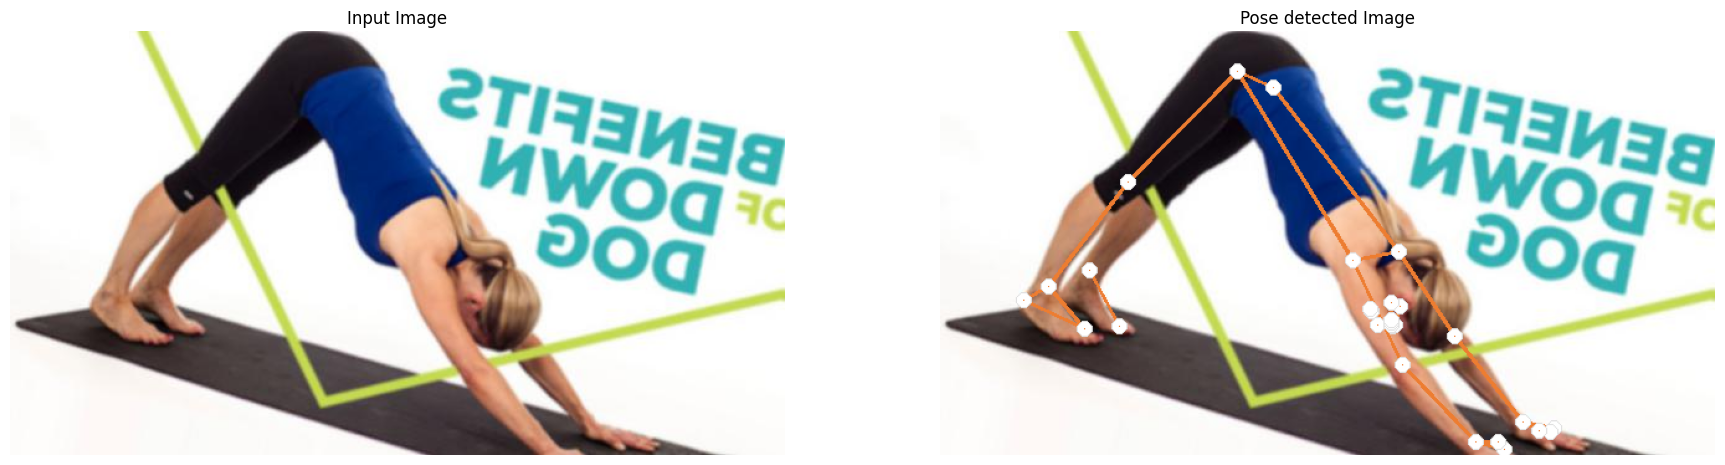

In [30]:
# image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
image_path = "E:/capstone/Dataset/possible_Ones augmented/adho mukha svanasana_augmented/yoga_0_207.jpeg"
output = cv2.imread(image_path)






image_pose = output 
pose = pose_image
draw = True
display = True
# def detectPose(image_pose, pose, draw=False, display=False):
    
original_image = image_pose.copy()

# original_bg = bg_output.copy()

image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

resultant = pose.process(image_in_RGB)

if resultant.pose_landmarks and draw:    

    mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                              connections=mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                           thickness=3, circle_radius=3),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                           thickness=2, circle_radius=2))
    
# #     -confidence -1 -
#     confidence = 0
#     for id, landmark in enumerate(resultant.pose_landmarks.landmark):
#         confidence_sum += landmark.visibility
#     confidence/=33
# #     print(f"Landmark {id}: Confidence (Visibility) = {confidence}")
#     print(f"Confidence (Visibility) = {confidence:.4f}")

    
    
    
     
    confidence_sum = 0
      
    for id, landmark in enumerate(resultant.pose_landmarks.landmark):
        confidence_sum += landmark.visibility  # Sum visibility scores

    # After looping through all landmarks, calculate the average confidence
    average_confidence = confidence_sum / len(resultant.pose_landmarks.landmark)
    print(f"Average Confidence (Visibility) = {average_confidence:.4f}")  

#     sum=0
#     for it in resultant.pose_landmarks.landmark:
#         sum+=it.visibility
#     avg=sum/33
#     avg="{0:.3f}".format(avg)
#     avg=str(avg)

#     print(avg)

    
    
    

if display:

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

        
         # else:
    #     return original_image, results




    # Here we will read our image from the specified path to detect the pose

    # detectPose(output, pose_image, draw=True, display=True)
    # landmark = resultant.pose_landmarks.landmark
    # print(landmark)




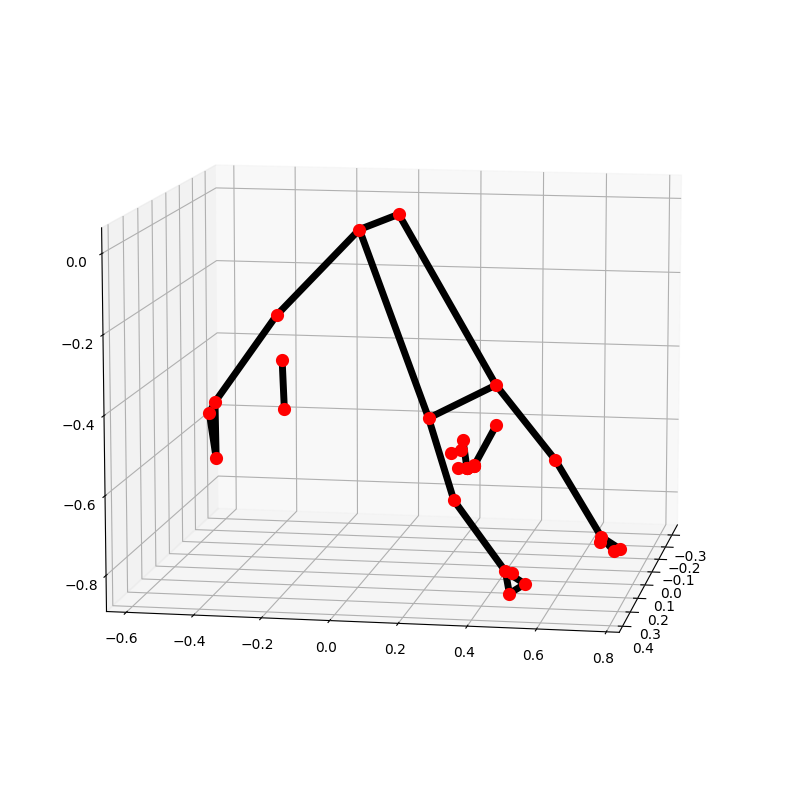

In [25]:
mp_drawing.plot_landmarks(
    resultant.pose_world_landmarks,
    mp_pose.POSE_CONNECTIONS
)

In [9]:
resultant.pose_landmarks.landmark

[x: 0.02493789792060852
y: 0.1710018813610077
z: -0.11226041615009308
visibility: 0.9999526739120483
, x: 0.03509357571601868
y: 0.13859541714191437
z: -0.15203647315502167
visibility: 0.9999513626098633
, x: 0.038299888372421265
y: 0.1375158131122589
z: -0.15214020013809204
visibility: 0.999954104423523
, x: 0.04172644019126892
y: 0.1360808163881302
z: -0.15216600894927979
visibility: 0.9999524354934692
, x: 0.03414297103881836
y: 0.13838019967079163
z: -0.08642945438623428
visibility: 0.9999291896820068
, x: 0.036539942026138306
y: 0.13736757636070251
z: -0.08638589829206467
visibility: 0.9999475479125977
, x: 0.03917554020881653
y: 0.13582584261894226
z: -0.08622163534164429
visibility: 0.9999717473983765
, x: 0.07762101292610168
y: 0.14606636762619019
z: -0.22633221745491028
visibility: 0.9999028444290161
, x: 0.0742732584476471
y: 0.14256221055984497
z: 0.0586203970015049
visibility: 0.9999793767929077
, x: 0.038737982511520386
y: 0.20315325260162354
z: -0.13599447906017303
visibi

In [31]:
# image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
image_path = "C:/Users/User/Downloads/temp/bhu_ (8).png"




output = cv2.imread(image_path)


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle
 





image_pose = output 
pose = pose_image
draw = True
display = True
# def detectPose(image_pose, pose, draw=False, display=False):
    
original_image = image_pose.copy()

# original_bg = bg_output.copy()

image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

resultant = pose.process(image_in_RGB)

if resultant.pose_landmarks and draw:    

    mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                              connections=mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                           thickness=3, circle_radius=3),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                           thickness=2, circle_radius=2))
    landmarks = resultant.pose_landmarks.landmark



####################################################################
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

    right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


    right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

    right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

    nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















#########################################################
    # CALCULATE THE ANGLE
#     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
#     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
#     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
#     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  


#     Adho mukha savasana

    

    leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
    leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

    hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
    hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
    hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)

    hip_1_1 = calculate_angles(left_knee,left_hip,nose)
    hip_2_2 = calculate_angles(right_knee,right_hip,nose)


    shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
    shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

    arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
    arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)
    
    
    lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
    lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

    middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
    middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

    upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
    upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)

    upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
    upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)






    arms = (arms_1 + arms_2)/2
    shoulder = (shoulder_1 + shoulder_2)/2
    hips = (hip_1 + hip_2)/2
    legs = (leg_1 + leg_2)/2

    hips_tri = hip_triangle

    hips_cc = (hip_1_1 + hip_2_2)/2


    lb = (lower_body_1 + lower_body_2)/2
    mb = (middle_body_1 + middle_body_2)/2
    ub = (upper_body_1 + upper_body_2)/2     
    ub2 = (upper_body_1_1 + upper_body_2_1)/2












#             setu bandha

    if((lb>=140 and lb<=175) and (mb>=105 and mb<=145) and (ub2>=140 and ub2<=175)):
        if display:

            plt.figure(figsize=[22,22])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');


    else:
        print("NO")
#     confidence_sum = 0
      
#     for id, landmark in enumerate(resultant.pose_landmarks.landmark):
#         confidence_sum += landmark.visibility  # Sum visibility scores

#     # After looping through all landmarks, calculate the average confidence
#     average_confidence = confidence_sum / len(resultant.pose_landmarks.landmark)
#     print(f"Average Confidence (Visibility) = {average_confidence:.4f}")  
    
    
    

# if display:

#         plt.figure(figsize=[22,22])
#         plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
#         plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

        
         # else:
    #     return original_image, results




    # Here we will read our image from the specified path to detect the pose

    # detectPose(output, pose_image, draw=True, display=True)
    # landmark = resultant.pose_landmarks.landmark
    # print(landmark)




AttributeError: 'NoneType' object has no attribute 'copy'

Average Confidence (Visibility) = 0.9853


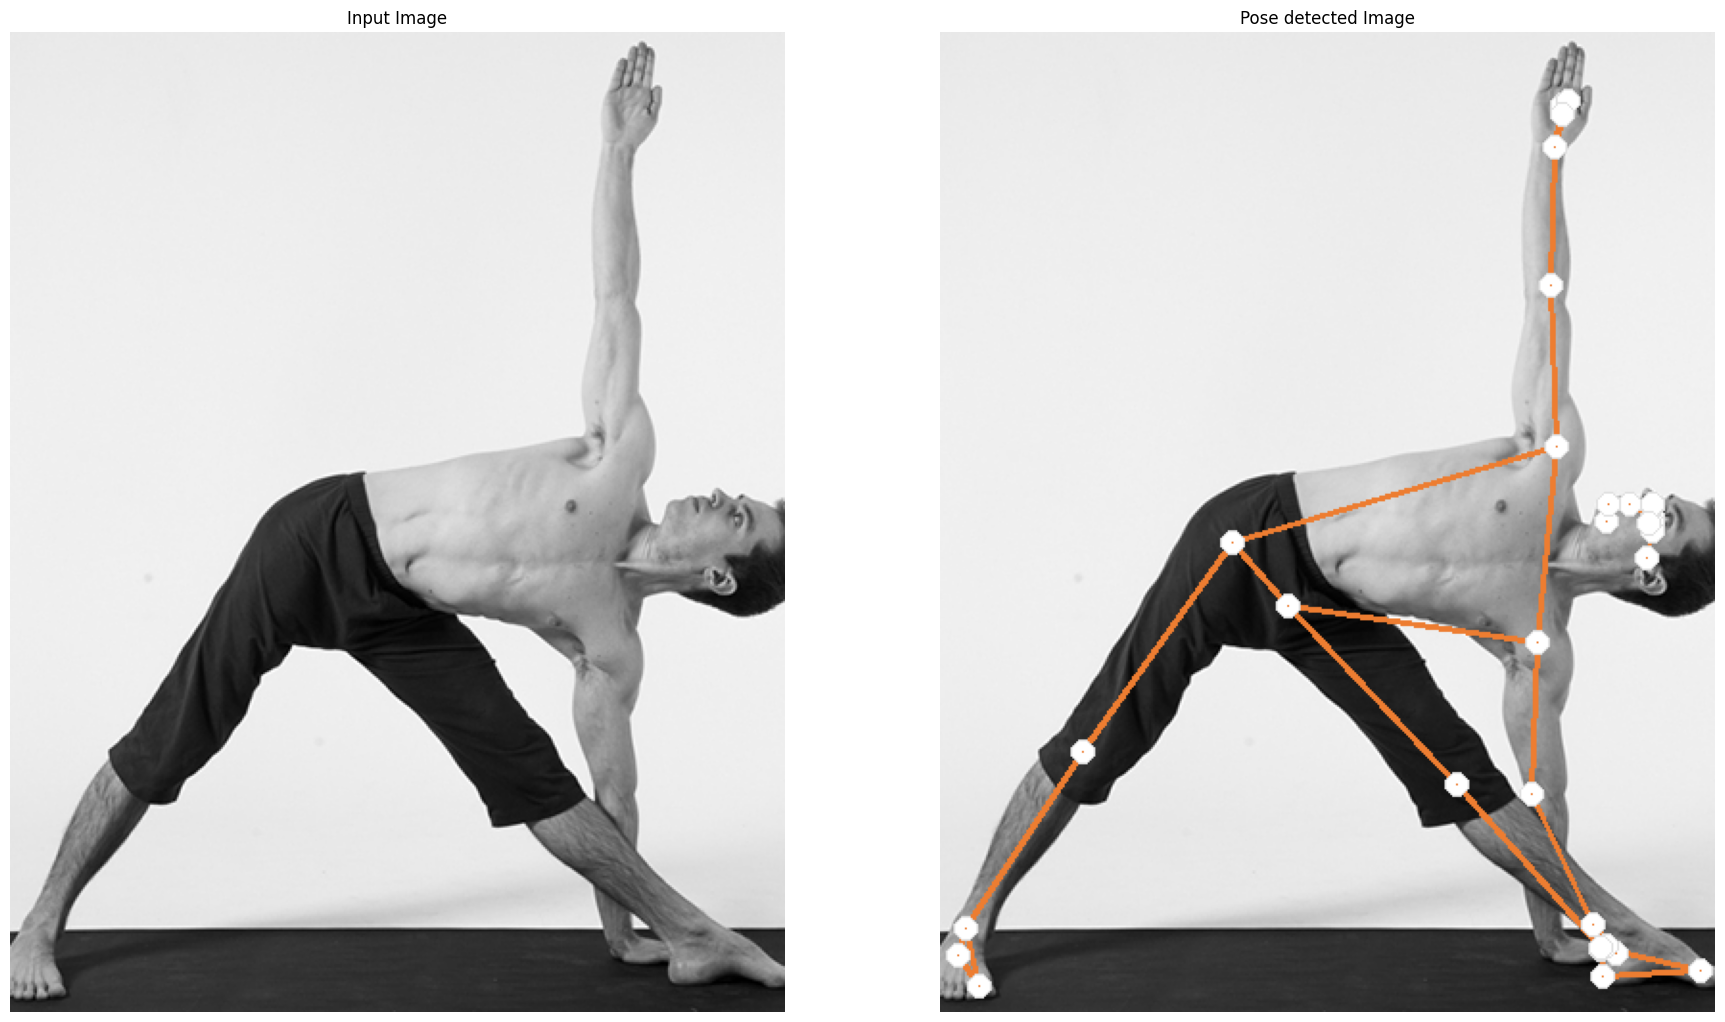

In [27]:
# image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
image_path = "E:/capstone/Dataset/possible_Ones/utthita trikonasana/0-0.png"
output = cv2.imread(image_path)






image_pose = output 
pose = pose_image
draw = True
display = True
# def detectPose(image_pose, pose, draw=False, display=False):
    
original_image = image_pose.copy()

# original_bg = bg_output.copy()

image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

resultant = pose.process(image_in_RGB)

if resultant.pose_landmarks and draw:    

    mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                              connections=mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                           thickness=3, circle_radius=3),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                       thickness=2, circle_radius=2))
    
    
    
    
    
    confidence_sum = 0
      
    for id, landmark in enumerate(resultant.pose_landmarks.landmark):
        confidence_sum += landmark.visibility  # Sum visibility scores

    # After looping through all landmarks, calculate the average confidence
    average_confidence = confidence_sum / len(resultant.pose_landmarks.landmark)
    print(f"Average Confidence (Visibility) = {average_confidence:.4f}")  
    
    
    

if display:

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

        
         # else:
    #     return original_image, results




    # Here we will read our image from the specified path to detect the pose

    # detectPose(output, pose_image, draw=True, display=True)
    # landmark = resultant.pose_landmarks.landmark
    # print(landmark)




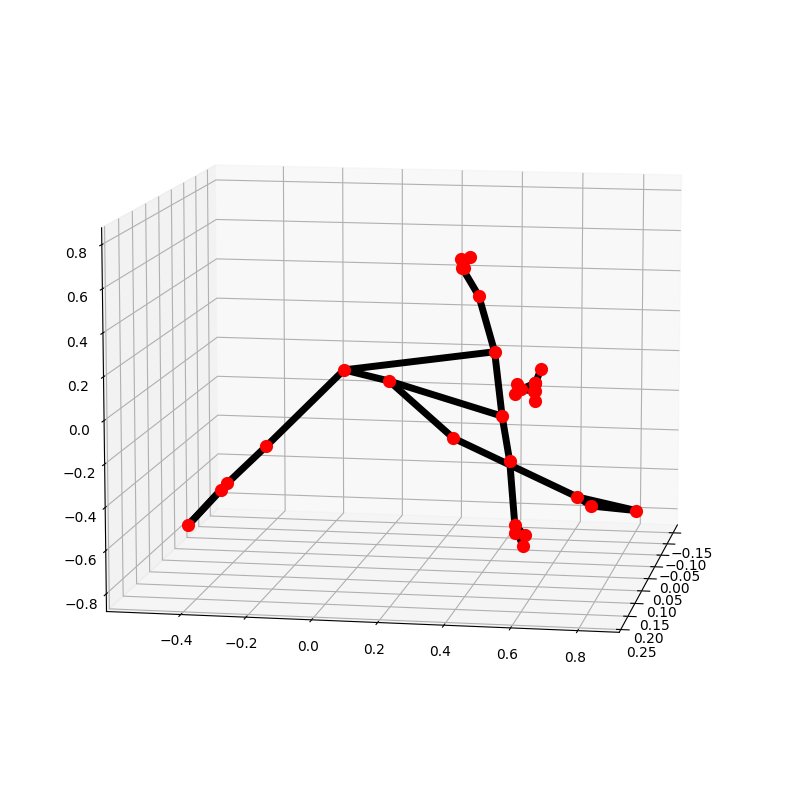

In [28]:
mp_drawing.plot_landmarks(
    resultant.pose_world_landmarks,
    mp_pose.POSE_CONNECTIONS
)

In [11]:
landmarks = resultant.pose_landmarks.landmark

NameError: name 'resultant' is not defined

In [12]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

NameError: name 'landmarks' is not defined

In [13]:
def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle

In [14]:
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

# CALCULATE THE ANGLE
angle = calculate_angles(elbow,shoulder,hip)
            

NameError: name 'landmarks' is not defined

In [15]:
angle

NameError: name 'angle' is not defined

In [16]:
import csv

# Sample data
data = [angle]

# Specify the file name
csv_file = "data.csv"

# Write data to CSV file
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(data)

print("Data has been written to", csv_file)

NameError: name 'angle' is not defined

In [36]:
import pandas as pd


In [37]:
df = pd.read_csv('data.csv',header=None)


In [38]:
df.rename(columns={0: 'angle'}, inplace=True)


In [39]:
df.head()


,angle,1,2,3
0,Left-Arm,Right-Arm,Left-Leg,Right-Leg
1,162.15544949496376,166.77964388298156,175.581564203023,31.379594719417014
2,162.45582703525642,160.44018695358793,178.92493247306027,38.02129476402971
3,145.33324585737935,143.099256996344,171.29431384343954,24.4538795555697
4,139.90030189742046,157.42728613320787,22.304689558751193,174.64375422868807


In [40]:
landmarks

[x: 0.6009153
y: 0.37482056
z: 0.021209398
visibility: 0.9990081
, x: 0.61728597
y: 0.37897468
z: 0.029795537
visibility: 0.9984498
, x: 0.6191128
y: 0.37569234
z: 0.029663472
visibility: 0.99819833
, x: 0.62093586
y: 0.37204513
z: 0.029494265
visibility: 0.9989536
, x: 0.6161448
y: 0.3801323
z: -0.017034287
visibility: 0.998725
, x: 0.6169866
y: 0.3781017
z: -0.017001824
visibility: 0.9984394
, x: 0.61777186
y: 0.37607813
z: -0.01689047
visibility: 0.99889743
, x: 0.62838876
y: 0.3308764
z: 0.114149615
visibility: 0.9989773
, x: 0.62294847
y: 0.3427991
z: -0.097439334
visibility: 0.99733585
, x: 0.5949649
y: 0.34830987
z: 0.06102791
visibility: 0.9958378
, x: 0.5934229
y: 0.34932268
z: -0.0010598353
visibility: 0.9959973
, x: 0.60560745
y: 0.25275603
z: 0.26089662
visibility: 0.9985967
, x: 0.58181906
y: 0.29249862
z: -0.2267103
visibility: 0.9995634
, x: 0.5743184
y: 0.50981957
z: 0.37963203
visibility: 0.42500067
, x: 0.560814
y: 0.5910381
z: -0.32711747
visibility: 0.9933342
, x: 0

In [41]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [17]:
# MAKE DETECTIONS

  
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened():
        ret, frame = cap.read()
        
        # DETECT STUFF AND RENDER
        
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



[x: 0.5544961094856262
y: 0.5459413528442383
z: -1.5228956937789917
visibility: 0.9998579025268555
, x: 0.5728146433830261
y: 0.4759669303894043
z: -1.4835902452468872
visibility: 0.999672532081604
, x: 0.5883241891860962
y: 0.47358089685440063
z: -1.4832675457000732
visibility: 0.9996498823165894
, x: 0.602279007434845
y: 0.47145795822143555
z: -1.483397126197815
visibility: 0.9994415640830994
, x: 0.5230710506439209
y: 0.4792763888835907
z: -1.5037201642990112
visibility: 0.999805748462677
, x: 0.5014737844467163
y: 0.47940999269485474
z: -1.5037411451339722
visibility: 0.9998481273651123
, x: 0.4829798638820648
y: 0.48009973764419556
z: -1.5040760040283203
visibility: 0.9998432397842407
, x: 0.6136817932128906
y: 0.48284202814102173
z: -1.1072357892990112
visibility: 0.9994183778762817
, x: 0.44848376512527466
y: 0.4931475520133972
z: -1.196628212928772
visibility: 0.999953031539917
, x: 0.5739029049873352
y: 0.6002433896064758
z: -1.3686960935592651
visibility: 0.9998434782028198
,

[x: 0.552870512008667
y: 0.5497764348983765
z: -1.6931079626083374
visibility: 0.9999032616615295
, x: 0.5712365508079529
y: 0.4913286566734314
z: -1.6518224477767944
visibility: 0.9997838735580444
, x: 0.5856894254684448
y: 0.49026474356651306
z: -1.6514339447021484
visibility: 0.999764621257782
, x: 0.5988026261329651
y: 0.489422470331192
z: -1.6514962911605835
visibility: 0.9996369481086731
, x: 0.5228076577186584
y: 0.4879497289657593
z: -1.6726999282836914
visibility: 0.9998700022697449
, x: 0.50135338306427
y: 0.48574644327163696
z: -1.6725883483886719
visibility: 0.9998946189880371
, x: 0.48301512002944946
y: 0.4854871928691864
z: -1.6727714538574219
visibility: 0.9998936057090759
, x: 0.6122852563858032
y: 0.49219274520874023
z: -1.2349879741668701
visibility: 0.9996155500411987
, x: 0.44915908575057983
y: 0.49328184127807617
z: -1.3233705759048462
visibility: 0.9999650120735168
, x: 0.5722377896308899
y: 0.6045092940330505
z: -1.5230110883712769
visibility: 0.9998924732208252


[x: 0.552747905254364
y: 0.5512679815292358
z: -1.5694578886032104
visibility: 0.99992436170578
, x: 0.5713091492652893
y: 0.4930255711078644
z: -1.5257272720336914
visibility: 0.9998356699943542
, x: 0.5858254432678223
y: 0.4917010962963104
z: -1.5253716707229614
visibility: 0.9998164772987366
, x: 0.5989212393760681
y: 0.4905094504356384
z: -1.5254180431365967
visibility: 0.9997266530990601
, x: 0.5231688022613525
y: 0.49049606919288635
z: -1.5484192371368408
visibility: 0.9999017119407654
, x: 0.5017074942588806
y: 0.48845991492271423
z: -1.5482946634292603
visibility: 0.9999182224273682
, x: 0.4834303855895996
y: 0.4882727563381195
z: -1.548514723777771
visibility: 0.9999189972877502
, x: 0.6121918559074402
y: 0.4932774305343628
z: -1.1170973777770996
visibility: 0.999701201915741
, x: 0.449209988117218
y: 0.4939676523208618
z: -1.2133983373641968
visibility: 0.9999709725379944
, x: 0.5718951225280762
y: 0.6062024235725403
z: -1.4035065174102783
visibility: 0.9999113082885742
, x: 

[x: 0.5511096715927124
y: 0.5472815036773682
z: -1.6423276662826538
visibility: 0.999934732913971
, x: 0.5696712732315063
y: 0.48766928911209106
z: -1.601539969444275
visibility: 0.9998623132705688
, x: 0.5845476984977722
y: 0.4857986867427826
z: -1.6011158227920532
visibility: 0.9998422265052795
, x: 0.5979191660881042
y: 0.4838428199291229
z: -1.6011247634887695
visibility: 0.9997745752334595
, x: 0.5207177400588989
y: 0.48680001497268677
z: -1.6203677654266357
visibility: 0.9999181032180786
, x: 0.4995719790458679
y: 0.4855267107486725
z: -1.620248794555664
visibility: 0.9999298453330994
, x: 0.4814547002315521
y: 0.4860624074935913
z: -1.6204144954681396
visibility: 0.9999318718910217
, x: 0.6111565828323364
y: 0.4862055480480194
z: -1.1865400075912476
visibility: 0.999743640422821
, x: 0.44760817289352417
y: 0.49247482419013977
z: -1.2653149366378784
visibility: 0.9999732375144958
, x: 0.5707494020462036
y: 0.6019619703292847
z: -1.4741051197052002
visibility: 0.9999191164970398
,

[x: 0.5479912161827087
y: 0.5423151850700378
z: -1.5756030082702637
visibility: 0.9999421238899231
, x: 0.5657252669334412
y: 0.48127201199531555
z: -1.5310035943984985
visibility: 0.9998852610588074
, x: 0.5803115963935852
y: 0.47899168729782104
z: -1.5306564569473267
visibility: 0.9998664259910583
, x: 0.5940836071968079
y: 0.4765312969684601
z: -1.530752182006836
visibility: 0.9998186826705933
, x: 0.5168358683586121
y: 0.48162999749183655
z: -1.5506302118301392
visibility: 0.9999294281005859
, x: 0.4966365694999695
y: 0.48056870698928833
z: -1.5504872798919678
visibility: 0.9999369978904724
, x: 0.47876811027526855
y: 0.48111552000045776
z: -1.5507093667984009
visibility: 0.9999406337738037
, x: 0.6079095005989075
y: 0.47967785596847534
z: -1.11991548538208
visibility: 0.9997900128364563
, x: 0.4453613758087158
y: 0.48897141218185425
z: -1.2024517059326172
visibility: 0.9999741315841675
, x: 0.5682385563850403
y: 0.5957215428352356
z: -1.410468578338623
visibility: 0.99992907047271

[x: 0.5451550483703613
y: 0.533854603767395
z: -1.432815432548523
visibility: 0.9999467134475708
, x: 0.5613404512405396
y: 0.4708525240421295
z: -1.395601511001587
visibility: 0.9998992681503296
, x: 0.5752590894699097
y: 0.46781688928604126
z: -1.3952363729476929
visibility: 0.9998823404312134
, x: 0.5887696743011475
y: 0.46468251943588257
z: -1.395387887954712
visibility: 0.999847412109375
, x: 0.5122969150543213
y: 0.4736749231815338
z: -1.414710521697998
visibility: 0.9999364614486694
, x: 0.49368253350257874
y: 0.47363224625587463
z: -1.4144996404647827
visibility: 0.9999414682388306
, x: 0.47588062286376953
y: 0.4744316339492798
z: -1.4146697521209717
visibility: 0.9999457597732544
, x: 0.6017826795578003
y: 0.4719164967536926
z: -1.0224955081939697
visibility: 0.999823272228241
, x: 0.4435787796974182
y: 0.4866231381893158
z: -1.1010692119598389
visibility: 0.9999752044677734
, x: 0.56593918800354
y: 0.5884334444999695
z: -1.2813568115234375
visibility: 0.9999367594718933
, x: 

[x: 0.5331088900566101
y: 0.5065943002700806
z: -1.234670877456665
visibility: 0.9999374151229858
, x: 0.5503185391426086
y: 0.44123682379722595
z: -1.1912118196487427
visibility: 0.9998878836631775
, x: 0.5631366968154907
y: 0.438458651304245
z: -1.1910663843154907
visibility: 0.9998742938041687
, x: 0.5757548809051514
y: 0.43623435497283936
z: -1.1911591291427612
visibility: 0.9998448491096497
, x: 0.5023011565208435
y: 0.4474779963493347
z: -1.2003475427627563
visibility: 0.9999204277992249
, x: 0.4846324026584625
y: 0.44919353723526
z: -1.2000322341918945
visibility: 0.9999237656593323
, x: 0.467904269695282
y: 0.45165395736694336
z: -1.2003449201583862
visibility: 0.9999286532402039
, x: 0.5927829146385193
y: 0.45144081115722656
z: -0.8251022100448608
visibility: 0.9998307824134827
, x: 0.4416598677635193
y: 0.47023287415504456
z: -0.8546201586723328
visibility: 0.9999672770500183
, x: 0.557050347328186
y: 0.5580462217330933
z: -1.0914143323898315
visibility: 0.9999372363090515
, 

[x: 0.5232704877853394
y: 0.45880889892578125
z: -0.9198405146598816
visibility: 0.9999173283576965
, x: 0.5406593680381775
y: 0.4032568335533142
z: -0.8758733868598938
visibility: 0.9998684525489807
, x: 0.5535330772399902
y: 0.4027234613895416
z: -0.8757146596908569
visibility: 0.9998557567596436
, x: 0.5655466318130493
y: 0.40282145142555237
z: -0.8756957054138184
visibility: 0.9998250007629395
, x: 0.49494439363479614
y: 0.4081311523914337
z: -0.8872848749160767
visibility: 0.9998955726623535
, x: 0.477287620306015
y: 0.4117148220539093
z: -0.8869654536247253
visibility: 0.9998978972434998
, x: 0.4616823196411133
y: 0.41541942954063416
z: -0.8872898817062378
visibility: 0.9999035000801086
, x: 0.5819119811058044
y: 0.4278657138347626
z: -0.5556849241256714
visibility: 0.9998245239257812
, x: 0.4393532872200012
y: 0.4446433484554291
z: -0.5958273410797119
visibility: 0.9999585151672363
, x: 0.5485907793045044
y: 0.5138863921165466
z: -0.7973774671554565
visibility: 0.999933004379272

[x: 0.5223015546798706
y: 0.3909693658351898
z: -0.8104597330093384
visibility: 0.9998748898506165
, x: 0.5374801158905029
y: 0.34577473998069763
z: -0.7628399729728699
visibility: 0.9997882843017578
, x: 0.5500487089157104
y: 0.34648507833480835
z: -0.7628234028816223
visibility: 0.9998012781143188
, x: 0.56137615442276
y: 0.34742164611816406
z: -0.762791633605957
visibility: 0.9997493624687195
, x: 0.49699077010154724
y: 0.34877216815948486
z: -0.7739745378494263
visibility: 0.9998069405555725
, x: 0.4814067780971527
y: 0.352157860994339
z: -0.7736753821372986
visibility: 0.9998251795768738
, x: 0.46652644872665405
y: 0.35729697346687317
z: -0.7740563750267029
visibility: 0.9998093247413635
, x: 0.5752206444740295
y: 0.3752439618110657
z: -0.4744652807712555
visibility: 0.9997731447219849
, x: 0.4443979263305664
y: 0.3945738673210144
z: -0.5141434669494629
visibility: 0.9999143481254578
, x: 0.5464576482772827
y: 0.4472234547138214
z: -0.7055193781852722
visibility: 0.999904334545135

[x: 0.5290149450302124
y: 0.39034321904182434
z: -0.8534423112869263
visibility: 0.9998553991317749
, x: 0.5411058068275452
y: 0.34584906697273254
z: -0.7966840863227844
visibility: 0.9997308254241943
, x: 0.5515254139900208
y: 0.3464408218860626
z: -0.7966650128364563
visibility: 0.99976646900177
, x: 0.5619373321533203
y: 0.34726032614707947
z: -0.7966277003288269
visibility: 0.9996979236602783
, x: 0.5050920248031616
y: 0.34901219606399536
z: -0.817940890789032
visibility: 0.9997459053993225
, x: 0.49015823006629944
y: 0.35248252749443054
z: -0.8176202774047852
visibility: 0.999779224395752
, x: 0.4760017395019531
y: 0.3574751913547516
z: -0.8179900050163269
visibility: 0.9997334480285645
, x: 0.5759169459342957
y: 0.375905841588974
z: -0.44221287965774536
visibility: 0.9997269511222839
, x: 0.4518468379974365
y: 0.39434584975242615
z: -0.5197042226791382
visibility: 0.9998695254325867
, x: 0.5514650344848633
y: 0.44592562317848206
z: -0.7294014096260071
visibility: 0.99988013505935

[x: 0.5276455879211426
y: 0.3908405601978302
z: -0.8209961652755737
visibility: 0.9998071193695068
, x: 0.5396722555160522
y: 0.3461911976337433
z: -0.7668527364730835
visibility: 0.9996659755706787
, x: 0.5503221750259399
y: 0.3467984199523926
z: -0.7668673992156982
visibility: 0.9996986389160156
, x: 0.5601649284362793
y: 0.3476503789424896
z: -0.7668848633766174
visibility: 0.9996408820152283
, x: 0.5024529099464417
y: 0.35025903582572937
z: -0.7767220139503479
visibility: 0.9996829628944397
, x: 0.48839443922042847
y: 0.3542400300502777
z: -0.7764216065406799
visibility: 0.9997114539146423
, x: 0.474956214427948
y: 0.3596152663230896
z: -0.7767096161842346
visibility: 0.9996417164802551
, x: 0.5733066201210022
y: 0.37626346945762634
z: -0.4020194113254547
visibility: 0.9996781945228577
, x: 0.4515071511268616
y: 0.3955187499523163
z: -0.4666444659233093
visibility: 0.9997835755348206
, x: 0.5515636205673218
y: 0.4441271722316742
z: -0.701004683971405
visibility: 0.9998637437820435


[x: 0.5113381147384644
y: 0.3956585228443146
z: -0.762271523475647
visibility: 0.9998623728752136
, x: 0.525484025478363
y: 0.3491697311401367
z: -0.7034708261489868
visibility: 0.9997550845146179
, x: 0.5392976999282837
y: 0.34904417395591736
z: -0.7035022377967834
visibility: 0.9997769594192505
, x: 0.5515416860580444
y: 0.3494388461112976
z: -0.7032557725906372
visibility: 0.9997258186340332
, x: 0.48485368490219116
y: 0.3558206558227539
z: -0.7106053233146667
visibility: 0.9997736215591431
, x: 0.471985399723053
y: 0.35952574014663696
z: -0.7101942896842957
visibility: 0.9997931718826294
, x: 0.46078553795814514
y: 0.3638119399547577
z: -0.7104824185371399
visibility: 0.9997366070747375
, x: 0.5680884122848511
y: 0.37730225920677185
z: -0.38082119822502136
visibility: 0.9997663497924805
, x: 0.4422447681427002
y: 0.3975662589073181
z: -0.40424418449401855
visibility: 0.9998472929000854
, x: 0.5430208444595337
y: 0.44459274411201477
z: -0.647274374961853
visibility: 0.99988961219787

[x: 0.5020582675933838
y: 0.39238956570625305
z: -0.6941113471984863
visibility: 0.9999080896377563
, x: 0.5196641683578491
y: 0.34744828939437866
z: -0.6304377317428589
visibility: 0.999834418296814
, x: 0.5344301462173462
y: 0.3471575975418091
z: -0.6300724744796753
visibility: 0.9998494386672974
, x: 0.5470641255378723
y: 0.3476334512233734
z: -0.6296955347061157
visibility: 0.9998143315315247
, x: 0.4762728214263916
y: 0.35318756103515625
z: -0.6343366503715515
visibility: 0.9998468160629272
, x: 0.46241647005081177
y: 0.3560613691806793
z: -0.6341029405593872
visibility: 0.9998600482940674
, x: 0.4511027932167053
y: 0.3593510091304779
z: -0.6341543793678284
visibility: 0.9998211860656738
, x: 0.5646719932556152
y: 0.3763999342918396
z: -0.31027302145957947
visibility: 0.9998435378074646
, x: 0.43225449323654175
y: 0.39212271571159363
z: -0.3199968934059143
visibility: 0.9998977780342102
, x: 0.5341129899024963
y: 0.43839961290359497
z: -0.583206057548523
visibility: 0.999924182891

[x: 0.49894222617149353
y: 0.4061277508735657
z: -0.6004518270492554
visibility: 0.9999452829360962
, x: 0.5182095170021057
y: 0.35685965418815613
z: -0.5386954545974731
visibility: 0.9999004602432251
, x: 0.5333356261253357
y: 0.35635823011398315
z: -0.5382572412490845
visibility: 0.9999093413352966
, x: 0.546208381652832
y: 0.3570151925086975
z: -0.5378295183181763
visibility: 0.9998883008956909
, x: 0.472372442483902
y: 0.3629389703273773
z: -0.5359371304512024
visibility: 0.9999080896377563
, x: 0.45800718665122986
y: 0.3660067319869995
z: -0.5354882478713989
visibility: 0.9999158978462219
, x: 0.4462898373603821
y: 0.36944738030433655
z: -0.5356036424636841
visibility: 0.9998929500579834
, x: 0.5646246671676636
y: 0.3796635866165161
z: -0.234846830368042
visibility: 0.9999062418937683
, x: 0.42778825759887695
y: 0.39264678955078125
z: -0.20643766224384308
visibility: 0.9999390840530396
, x: 0.5313863158226013
y: 0.45130249857902527
z: -0.4990472197532654
visibility: 0.999953150749

[x: 0.5011582970619202
y: 0.4086391031742096
z: -0.5673182010650635
visibility: 0.9999659657478333
, x: 0.5210293531417847
y: 0.36118608713150024
z: -0.5014165043830872
visibility: 0.9999368786811829
, x: 0.5367354154586792
y: 0.3603871762752533
z: -0.5009567141532898
visibility: 0.9999397397041321
, x: 0.5505231618881226
y: 0.3603264391422272
z: -0.5004878640174866
visibility: 0.9999290108680725
, x: 0.47347599267959595
y: 0.36735570430755615
z: -0.5001153349876404
visibility: 0.9999421238899231
, x: 0.45890799164772034
y: 0.37036359310150146
z: -0.49964576959609985
visibility: 0.9999451637268066
, x: 0.4467121660709381
y: 0.37379974126815796
z: -0.4998762607574463
visibility: 0.9999337196350098
, x: 0.5661186575889587
y: 0.3788236975669861
z: -0.18696843087673187
visibility: 0.9999381303787231
, x: 0.4264252185821533
y: 0.3932134509086609
z: -0.16116484999656677
visibility: 0.9999617338180542
, x: 0.533923327922821
y: 0.451293021440506
z: -0.462582528591156
visibility: 0.999966084957

[x: 0.5007954835891724
y: 0.415995717048645
z: -0.6397185921669006
visibility: 0.9999771118164062
, x: 0.5202552676200867
y: 0.36432936787605286
z: -0.5728179216384888
visibility: 0.9999570846557617
, x: 0.5359256267547607
y: 0.36259448528289795
z: -0.5724045038223267
visibility: 0.9999550580978394
, x: 0.5498445630073547
y: 0.36204245686531067
z: -0.5721341967582703
visibility: 0.9999516010284424
, x: 0.4720039367675781
y: 0.3763454258441925
z: -0.5712074041366577
visibility: 0.9999609589576721
, x: 0.4567459225654602
y: 0.38212570548057556
z: -0.5707657933235168
visibility: 0.9999606609344482
, x: 0.44400137662887573
y: 0.387613445520401
z: -0.5710328817367554
visibility: 0.9999572038650513
, x: 0.5655530095100403
y: 0.38154757022857666
z: -0.21573372185230255
visibility: 0.9999561905860901
, x: 0.4215000569820404
y: 0.4049592614173889
z: -0.17830894887447357
visibility: 0.9999747276306152
, x: 0.5339404940605164
y: 0.4547230899333954
z: -0.523139238357544
visibility: 0.9999738335609

[x: 0.5001006126403809
y: 0.4182920455932617
z: -0.4807688593864441
visibility: 0.9999834895133972
, x: 0.5186305046081543
y: 0.36598828434944153
z: -0.41284093260765076
visibility: 0.9999688863754272
, x: 0.5341123342514038
y: 0.36370977759361267
z: -0.41241759061813354
visibility: 0.9999654293060303
, x: 0.5478397011756897
y: 0.3628423511981964
z: -0.4120914041996002
visibility: 0.9999648928642273
, x: 0.4708711504936218
y: 0.3795861005783081
z: -0.40790310502052307
visibility: 0.9999720454216003
, x: 0.4556359350681305
y: 0.3855614960193634
z: -0.40744906663894653
visibility: 0.9999706745147705
, x: 0.4428635239601135
y: 0.3909587860107422
z: -0.40773826837539673
visibility: 0.9999702572822571
, x: 0.5639346241950989
y: 0.3831435739994049
z: -0.0986284464597702
visibility: 0.9999675154685974
, x: 0.42005616426467896
y: 0.40929338335990906
z: -0.05113982409238815
visibility: 0.9999821782112122
, x: 0.5333943367004395
y: 0.4556075930595398
z: -0.37702035903930664
visibility: 0.9999792

[x: 0.5026258230209351
y: 0.4206187129020691
z: -0.6174587607383728
visibility: 0.9999886751174927
, x: 0.5207738876342773
y: 0.3681545555591583
z: -0.5543584823608398
visibility: 0.9999783039093018
, x: 0.5352286100387573
y: 0.3656204342842102
z: -0.553799033164978
visibility: 0.9999738335609436
, x: 0.5487843751907349
y: 0.36456504464149475
z: -0.5534452199935913
visibility: 0.999975323677063
, x: 0.4740116596221924
y: 0.3819130063056946
z: -0.5507287383079529
visibility: 0.9999809861183167
, x: 0.458177387714386
y: 0.3877929449081421
z: -0.5502753853797913
visibility: 0.9999790191650391
, x: 0.44450506567955017
y: 0.39305245876312256
z: -0.5505777597427368
visibility: 0.9999806880950928
, x: 0.5646406412124634
y: 0.38418442010879517
z: -0.22391478717327118
visibility: 0.9999762177467346
, x: 0.4205135703086853
y: 0.41077154874801636
z: -0.18582192063331604
visibility: 0.9999881386756897
, x: 0.534349799156189
y: 0.4573037922382355
z: -0.5058012008666992
visibility: 0.999983787536621

[x: 0.4988037049770355
y: 0.42112991213798523
z: -0.7297142148017883
visibility: 0.9999893307685852
, x: 0.5167378187179565
y: 0.3701869249343872
z: -0.661724865436554
visibility: 0.9999785423278809
, x: 0.5315266847610474
y: 0.36799678206443787
z: -0.6612219214439392
visibility: 0.9999710917472839
, x: 0.5447275638580322
y: 0.36724865436553955
z: -0.6609206795692444
visibility: 0.9999753832817078
, x: 0.4717067778110504
y: 0.382413774728775
z: -0.6591742634773254
visibility: 0.9999820590019226
, x: 0.45627784729003906
y: 0.3878258764743805
z: -0.6588019728660583
visibility: 0.9999793171882629
, x: 0.4427775740623474
y: 0.39264822006225586
z: -0.6590874195098877
visibility: 0.9999837279319763
, x: 0.5601579546928406
y: 0.3865383267402649
z: -0.29661616683006287
visibility: 0.9999759197235107
, x: 0.4187299311161041
y: 0.41190382838249207
z: -0.2672877013683319
visibility: 0.9999895095825195
, x: 0.5299236178398132
y: 0.4593484699726105
z: -0.6049430966377258
visibility: 0.9999819397926

[x: 0.4780811369419098
y: 0.42159849405288696
z: -0.4925518035888672
visibility: 0.999990701675415
, x: 0.49637851119041443
y: 0.37224289774894714
z: -0.4290344715118408
visibility: 0.9999797940254211
, x: 0.5127946138381958
y: 0.3699577748775482
z: -0.4284434914588928
visibility: 0.9999712109565735
, x: 0.5284785032272339
y: 0.36893266439437866
z: -0.42803725600242615
visibility: 0.9999769330024719
, x: 0.45143264532089233
y: 0.38367924094200134
z: -0.4171273112297058
visibility: 0.9999838471412659
, x: 0.43762511014938354
y: 0.38854968547821045
z: -0.41670092940330505
visibility: 0.9999805688858032
, x: 0.4246833920478821
y: 0.3929864764213562
z: -0.4169858396053314
visibility: 0.999986469745636
, x: 0.547049880027771
y: 0.38836851716041565
z: -0.13033202290534973
visibility: 0.9999766945838928
, x: 0.4020427167415619
y: 0.4135890007019043
z: -0.05769585818052292
visibility: 0.9999906420707703
, x: 0.512328028678894
y: 0.4607132077217102
z: -0.3960431218147278
visibility: 0.999980509

[x: 0.47900980710983276
y: 0.4186342656612396
z: -0.5888827443122864
visibility: 0.9999924302101135
, x: 0.49800992012023926
y: 0.37038516998291016
z: -0.5219008326530457
visibility: 0.9999823570251465
, x: 0.5137364268302917
y: 0.36842596530914307
z: -0.5212675929069519
visibility: 0.9999738931655884
, x: 0.528332531452179
y: 0.3676668107509613
z: -0.5208050012588501
visibility: 0.9999796748161316
, x: 0.4526541829109192
y: 0.38061991333961487
z: -0.5173348188400269
visibility: 0.9999867081642151
, x: 0.4381222724914551
y: 0.38530030846595764
z: -0.5170580148696899
visibility: 0.9999840259552002
, x: 0.4249156415462494
y: 0.38951483368873596
z: -0.5173431634902954
visibility: 0.9999896883964539
, x: 0.5457489490509033
y: 0.3879709839820862
z: -0.18536347150802612
visibility: 0.9999786019325256
, x: 0.40168866515159607
y: 0.4110282063484192
z: -0.15238210558891296
visibility: 0.9999926090240479
, x: 0.5124449133872986
y: 0.45936739444732666
z: -0.4770316183567047
visibility: 0.99998092

[x: 0.48712214827537537
y: 0.4182089865207672
z: -0.6637827157974243
visibility: 0.9999929070472717
, x: 0.507049560546875
y: 0.3710292875766754
z: -0.597519040107727
visibility: 0.9999821782112122
, x: 0.5213710069656372
y: 0.3696724772453308
z: -0.5968767404556274
visibility: 0.999973714351654
, x: 0.5341825485229492
y: 0.36947113275527954
z: -0.5965246558189392
visibility: 0.9999790787696838
, x: 0.4623951017856598
y: 0.3797014355659485
z: -0.5915626287460327
visibility: 0.9999868273735046
, x: 0.44714680314064026
y: 0.3838788866996765
z: -0.5912295579910278
visibility: 0.9999843835830688
, x: 0.43380969762802124
y: 0.3876499533653259
z: -0.5914570093154907
visibility: 0.9999902248382568
, x: 0.5497440099716187
y: 0.3899535536766052
z: -0.25661545991897583
visibility: 0.9999783039093018
, x: 0.4100418984889984
y: 0.4073513448238373
z: -0.21448688209056854
visibility: 0.999992847442627
, x: 0.5171937942504883
y: 0.4589291512966156
z: -0.5486524105072021
visibility: 0.9999809265136719

[x: 0.5017864108085632
y: 0.41886138916015625
z: -0.6363096237182617
visibility: 0.9999934434890747
, x: 0.5210912227630615
y: 0.3709310293197632
z: -0.571168065071106
visibility: 0.9999840259552002
, x: 0.5339576005935669
y: 0.369885116815567
z: -0.570582926273346
visibility: 0.9999754428863525
, x: 0.5462847352027893
y: 0.36978211998939514
z: -0.5701979398727417
visibility: 0.9999805092811584
, x: 0.47469958662986755
y: 0.37814170122146606
z: -0.5722947716712952
visibility: 0.999988317489624
, x: 0.45886245369911194
y: 0.38182762265205383
z: -0.5718972682952881
visibility: 0.9999856948852539
, x: 0.4437808394432068
y: 0.3853350281715393
z: -0.5721794366836548
visibility: 0.9999914169311523
, x: 0.55921471118927
y: 0.38902437686920166
z: -0.22800850868225098
visibility: 0.9999793171882629
, x: 0.41909345984458923
y: 0.4047764241695404
z: -0.2134266197681427
visibility: 0.9999938011169434
, x: 0.5279346704483032
y: 0.4589473605155945
z: -0.5160881280899048
visibility: 0.999982595443725

[x: 0.5088223218917847
y: 0.4175303280353546
z: -0.6598011255264282
visibility: 0.9999951124191284
, x: 0.5279489755630493
y: 0.36881223320961
z: -0.5788261890411377
visibility: 0.9999880194664001
, x: 0.5407518148422241
y: 0.3679809272289276
z: -0.5782073736190796
visibility: 0.9999815225601196
, x: 0.5537532567977905
y: 0.3676309287548065
z: -0.5774607062339783
visibility: 0.9999851584434509
, x: 0.4831914007663727
y: 0.37403377890586853
z: -0.5854775905609131
visibility: 0.9999913573265076
, x: 0.46830910444259644
y: 0.3767656981945038
z: -0.5852257609367371
visibility: 0.9999893307685852
, x: 0.45311546325683594
y: 0.37969863414764404
z: -0.5853900909423828
visibility: 0.999993622303009
, x: 0.567742645740509
y: 0.3879656195640564
z: -0.21500611305236816
visibility: 0.9999843239784241
, x: 0.4284581243991852
y: 0.3984871804714203
z: -0.23132798075675964
visibility: 0.9999954700469971
, x: 0.5333963632583618
y: 0.4572699964046478
z: -0.5368013381958008
visibility: 0.999986469745636


[x: 0.5072693824768066
y: 0.4141097068786621
z: -1.0207321643829346
visibility: 0.999996542930603
, x: 0.5272132158279419
y: 0.36472195386886597
z: -0.9428135752677917
visibility: 0.9999908208847046
, x: 0.540502667427063
y: 0.3636021018028259
z: -0.9421709775924683
visibility: 0.9999862909317017
, x: 0.5535448789596558
y: 0.3627395033836365
z: -0.9414905309677124
visibility: 0.9999879598617554
, x: 0.4822530150413513
y: 0.37035274505615234
z: -0.9354177713394165
visibility: 0.999993622303009
, x: 0.4674464166164398
y: 0.37302201986312866
z: -0.935164749622345
visibility: 0.9999923706054688
, x: 0.45238742232322693
y: 0.3761785924434662
z: -0.9353167414665222
visibility: 0.9999951124191284
, x: 0.566719114780426
y: 0.3841591775417328
z: -0.5418851971626282
visibility: 0.9999881386756897
, x: 0.427996963262558
y: 0.395376056432724
z: -0.48953723907470703
visibility: 0.9999967813491821
, x: 0.5324289202690125
y: 0.45364606380462646
z: -0.8818457722663879
visibility: 0.99998939037323
, x:

[x: 0.5004479289054871
y: 0.41406720876693726
z: -1.1556140184402466
visibility: 0.9999970197677612
, x: 0.520105242729187
y: 0.36496222019195557
z: -1.0781633853912354
visibility: 0.9999904036521912
, x: 0.5340832471847534
y: 0.36366167664527893
z: -1.0776230096817017
visibility: 0.9999868869781494
, x: 0.546578049659729
y: 0.3627179265022278
z: -1.0770331621170044
visibility: 0.9999844431877136
, x: 0.4770083427429199
y: 0.37071478366851807
z: -1.0619781017303467
visibility: 0.9999940395355225
, x: 0.462615966796875
y: 0.3733638823032379
z: -1.0618102550506592
visibility: 0.9999938607215881
, x: 0.44960346817970276
y: 0.37640315294265747
z: -1.0620582103729248
visibility: 0.9999952912330627
, x: 0.5601294636726379
y: 0.3837575912475586
z: -0.6555858850479126
visibility: 0.9999869465827942
, x: 0.4269205629825592
y: 0.395180881023407
z: -0.5582877993583679
visibility: 0.9999974370002747
, x: 0.5274693369865417
y: 0.4525544047355652
z: -1.0083048343658447
visibility: 0.9999876022338867

[x: 0.5017424821853638
y: 0.4137028157711029
z: -1.077393889427185
visibility: 0.9999967813491821
, x: 0.521531879901886
y: 0.3646569550037384
z: -0.9994978904724121
visibility: 0.9999883770942688
, x: 0.5352634191513062
y: 0.36330702900886536
z: -0.9988892674446106
visibility: 0.999984860420227
, x: 0.5478174090385437
y: 0.362306147813797
z: -0.9983344078063965
visibility: 0.9999786615371704
, x: 0.47781166434288025
y: 0.37051379680633545
z: -0.9907559156417847
visibility: 0.9999933242797852
, x: 0.46319127082824707
y: 0.37323102355003357
z: -0.9905325174331665
visibility: 0.9999939203262329
, x: 0.44978195428848267
y: 0.3763969838619232
z: -0.9907214045524597
visibility: 0.9999945759773254
, x: 0.561165988445282
y: 0.38350117206573486
z: -0.5926266312599182
visibility: 0.999983012676239
, x: 0.42733699083328247
y: 0.39602646231651306
z: -0.5391854047775269
visibility: 0.9999973177909851
, x: 0.5285953879356384
y: 0.45217055082321167
z: -0.9366528391838074
visibility: 0.99998372793197

[x: 0.5081943273544312
y: 0.4109678864479065
z: -0.6886791586875916
visibility: 0.9999978542327881
, x: 0.5272114276885986
y: 0.36296209692955017
z: -0.609351396560669
visibility: 0.9999920725822449
, x: 0.5405765771865845
y: 0.36209216713905334
z: -0.6086508631706238
visibility: 0.999989926815033
, x: 0.5538564324378967
y: 0.36140868067741394
z: -0.6079246401786804
visibility: 0.9999858140945435
, x: 0.48312219977378845
y: 0.36796924471855164
z: -0.6119867563247681
visibility: 0.9999955296516418
, x: 0.4682392477989197
y: 0.37055984139442444
z: -0.6117845177650452
visibility: 0.9999959468841553
, x: 0.4535352289676666
y: 0.37363797426223755
z: -0.6118891835212708
visibility: 0.9999963641166687
, x: 0.5673548579216003
y: 0.38363388180732727
z: -0.24024291336536407
visibility: 0.999988853931427
, x: 0.42857664823532104
y: 0.39499086141586304
z: -0.24238264560699463
visibility: 0.9999982118606567
, x: 0.5337588787078857
y: 0.4511905014514923
z: -0.5644941926002502
visibility: 0.999988973

[x: 0.5082073211669922
y: 0.41633471846580505
z: -0.6646388173103333
visibility: 0.9999967813491821
, x: 0.5277248620986938
y: 0.3667677044868469
z: -0.5959407091140747
visibility: 0.9999908804893494
, x: 0.5410768985748291
y: 0.36589935421943665
z: -0.5953266620635986
visibility: 0.9999863505363464
, x: 0.5542019605636597
y: 0.36563363671302795
z: -0.5947595834732056
visibility: 0.9999859929084778
, x: 0.4822755455970764
y: 0.3729041814804077
z: -0.5919672250747681
visibility: 0.999994158744812
, x: 0.4662292003631592
y: 0.3762234151363373
z: -0.5916345119476318
visibility: 0.9999929070472717
, x: 0.4513779282569885
y: 0.3794344663619995
z: -0.5918554067611694
visibility: 0.9999954104423523
, x: 0.5676507353782654
y: 0.3858068883419037
z: -0.24626898765563965
visibility: 0.9999867081642151
, x: 0.42731088399887085
y: 0.39935389161109924
z: -0.21693944931030273
visibility: 0.9999971389770508
, x: 0.5345242023468018
y: 0.4555768668651581
z: -0.5464510321617126
visibility: 0.999988675117

[x: 0.5083543062210083
y: 0.4185180366039276
z: -0.7385022640228271
visibility: 0.9999945163726807
, x: 0.5275082588195801
y: 0.36960098147392273
z: -0.675134539604187
visibility: 0.9999867677688599
, x: 0.54092937707901
y: 0.36864084005355835
z: -0.6745176315307617
visibility: 0.9999798536300659
, x: 0.5536366701126099
y: 0.3683892786502838
z: -0.6741836071014404
visibility: 0.999981701374054
, x: 0.4823581278324127
y: 0.3756004571914673
z: -0.6753419637680054
visibility: 0.9999907612800598
, x: 0.4664885401725769
y: 0.3787285387516022
z: -0.6750133633613586
visibility: 0.9999889731407166
, x: 0.4516642093658447
y: 0.38175851106643677
z: -0.6752640008926392
visibility: 0.9999930262565613
, x: 0.566534161567688
y: 0.3862340748310089
z: -0.3308698236942291
visibility: 0.9999827742576599
, x: 0.42728906869888306
y: 0.39876788854599
z: -0.3201555609703064
visibility: 0.9999954700469971
, x: 0.5341382026672363
y: 0.4569154381752014
z: -0.6199008226394653
visibility: 0.9999867677688599
, x:

[x: 0.505001425743103
y: 0.4167517125606537
z: -0.7491969466209412
visibility: 0.9999932646751404
, x: 0.5240756273269653
y: 0.3688375651836395
z: -0.6818437576293945
visibility: 0.9999848008155823
, x: 0.537887454032898
y: 0.36760619282722473
z: -0.681264340877533
visibility: 0.999976396560669
, x: 0.5504331588745117
y: 0.3671436011791229
z: -0.6808674931526184
visibility: 0.9999791383743286
, x: 0.47927021980285645
y: 0.3754015564918518
z: -0.68578040599823
visibility: 0.9999895691871643
, x: 0.4634930491447449
y: 0.3788794279098511
z: -0.6854959726333618
visibility: 0.9999876618385315
, x: 0.4493642747402191
y: 0.3822738528251648
z: -0.6857433915138245
visibility: 0.9999922513961792
, x: 0.5633284449577332
y: 0.38582462072372437
z: -0.3060595393180847
visibility: 0.9999794363975525
, x: 0.4255649149417877
y: 0.4012411832809448
z: -0.3150928318500519
visibility: 0.9999948740005493
, x: 0.5320420861244202
y: 0.45489540696144104
z: -0.6187974810600281
visibility: 0.9999852776527405
, x

[x: 0.5027484893798828
y: 0.4185868799686432
z: -0.695188581943512
visibility: 0.9999916553497314
, x: 0.5209468603134155
y: 0.3709125220775604
z: -0.6317690014839172
visibility: 0.9999801516532898
, x: 0.5353567600250244
y: 0.36936140060424805
z: -0.6310498714447021
visibility: 0.9999686479568481
, x: 0.5482455492019653
y: 0.36865663528442383
z: -0.6307370662689209
visibility: 0.9999741911888123
, x: 0.4763966202735901
y: 0.37850746512413025
z: -0.6219773888587952
visibility: 0.9999859929084778
, x: 0.46119529008865356
y: 0.38245585560798645
z: -0.6215634942054749
visibility: 0.9999829530715942
, x: 0.44782114028930664
y: 0.38615304231643677
z: -0.6217626929283142
visibility: 0.999989926815033
, x: 0.561570942401886
y: 0.3861697316169739
z: -0.29259994626045227
visibility: 0.9999743103981018
, x: 0.42464107275009155
y: 0.40643543004989624
z: -0.22974209487438202
visibility: 0.9999927282333374
, x: 0.5312551259994507
y: 0.45592424273490906
z: -0.5795591473579407
visibility: 0.999980390

[x: 0.5042111277580261
y: 0.4190867245197296
z: -0.5907108187675476
visibility: 0.999989926815033
, x: 0.5217847228050232
y: 0.3711755573749542
z: -0.5276304483413696
visibility: 0.9999759793281555
, x: 0.5358280539512634
y: 0.36955779790878296
z: -0.5270006656646729
visibility: 0.9999616742134094
, x: 0.5485621690750122
y: 0.3687523305416107
z: -0.5266901254653931
visibility: 0.9999701976776123
, x: 0.47711554169654846
y: 0.37878212332725525
z: -0.525253176689148
visibility: 0.9999825358390808
, x: 0.4618171751499176
y: 0.38273340463638306
z: -0.5248857736587524
visibility: 0.9999778866767883
, x: 0.448221355676651
y: 0.38645970821380615
z: -0.5251321792602539
visibility: 0.9999874830245972
, x: 0.561543345451355
y: 0.3856551945209503
z: -0.2058263123035431
visibility: 0.9999692440032959
, x: 0.4241422116756439
y: 0.40683513879776
z: -0.17659947276115417
visibility: 0.9999902844429016
, x: 0.5317617654800415
y: 0.456096351146698
z: -0.48120516538619995
visibility: 0.9999756813049316
,

[x: 0.508587658405304
y: 0.4210953414440155
z: -0.6502617597579956
visibility: 0.9999849796295166
, x: 0.5250169038772583
y: 0.37326404452323914
z: -0.5832659006118774
visibility: 0.999963641166687
, x: 0.5379661917686462
y: 0.3721209764480591
z: -0.5826369524002075
visibility: 0.9999414086341858
, x: 0.5506225228309631
y: 0.3717113435268402
z: -0.5825983285903931
visibility: 0.9999575018882751
, x: 0.48139676451683044
y: 0.3796585202217102
z: -0.5875088572502136
visibility: 0.9999720454216003
, x: 0.4659744203090668
y: 0.3833310902118683
z: -0.5872136950492859
visibility: 0.9999624490737915
, x: 0.45151156187057495
y: 0.38693225383758545
z: -0.5874744653701782
visibility: 0.9999797940254211
, x: 0.5628560781478882
y: 0.38803160190582275
z: -0.2247224599123001
visibility: 0.9999548196792603
, x: 0.42501774430274963
y: 0.4060124456882477
z: -0.22819261252880096
visibility: 0.9999828338623047
, x: 0.5333589911460876
y: 0.45811477303504944
z: -0.5246325731277466
visibility: 0.999960184097

[x: 0.5094877481460571
y: 0.42143550515174866
z: -0.5348197817802429
visibility: 0.9999829530715942
, x: 0.5255926847457886
y: 0.3738427758216858
z: -0.46978917717933655
visibility: 0.9999486804008484
, x: 0.5379874110221863
y: 0.3729463219642639
z: -0.46945294737815857
visibility: 0.999924898147583
, x: 0.5503625273704529
y: 0.37289321422576904
z: -0.4692607522010803
visibility: 0.9999520778656006
, x: 0.4833325445652008
y: 0.38009577989578247
z: -0.4670190215110779
visibility: 0.9999578595161438
, x: 0.46810635924339294
y: 0.3837589919567108
z: -0.4669068455696106
visibility: 0.9999449253082275
, x: 0.45365214347839355
y: 0.38746798038482666
z: -0.4669419825077057
visibility: 0.999972939491272
, x: 0.5629841089248657
y: 0.39209040999412537
z: -0.1761566549539566
visibility: 0.9999513626098633
, x: 0.42708835005760193
y: 0.40715891122817993
z: -0.15162613987922668
visibility: 0.9999781847000122
, x: 0.5338636636734009
y: 0.4605041742324829
z: -0.43955540657043457
visibility: 0.9999482

[x: 0.5091145038604736
y: 0.42396730184555054
z: -0.4942137598991394
visibility: 0.999976634979248
, x: 0.5251897573471069
y: 0.3770131766796112
z: -0.43397068977355957
visibility: 0.9999345541000366
, x: 0.5374671220779419
y: 0.37649860978126526
z: -0.4333983361721039
visibility: 0.9999019503593445
, x: 0.5495226979255676
y: 0.37697964906692505
z: -0.433219850063324
visibility: 0.9999388456344604
, x: 0.48269638419151306
y: 0.38289862871170044
z: -0.43161433935165405
visibility: 0.9999441504478455
, x: 0.46757006645202637
y: 0.38674965500831604
z: -0.4312881529331207
visibility: 0.9999226927757263
, x: 0.45319780707359314
y: 0.39111825823783875
z: -0.4315526485443115
visibility: 0.9999622106552124
, x: 0.5622826814651489
y: 0.39647287130355835
z: -0.14985881745815277
visibility: 0.9999372959136963
, x: 0.42676129937171936
y: 0.4121646285057068
z: -0.12226185947656631
visibility: 0.9999694228172302
, x: 0.533739447593689
y: 0.4636158049106598
z: -0.39959901571273804
visibility: 0.99993

[x: 0.5091057419776917
y: 0.4301204979419708
z: -0.7041295766830444
visibility: 0.999973475933075
, x: 0.5251988768577576
y: 0.38464832305908203
z: -0.647219181060791
visibility: 0.9999247193336487
, x: 0.5374605059623718
y: 0.3843122124671936
z: -0.6467797756195068
visibility: 0.9998891949653625
, x: 0.5494171380996704
y: 0.3849145174026489
z: -0.6467861533164978
visibility: 0.9999315738677979
, x: 0.4823874831199646
y: 0.3890841603279114
z: -0.6407228708267212
visibility: 0.9999333620071411
, x: 0.46719151735305786
y: 0.3921562731266022
z: -0.640411376953125
visibility: 0.9999060034751892
, x: 0.4527824819087982
y: 0.3958510756492615
z: -0.6405695676803589
visibility: 0.9999532103538513
, x: 0.5625166893005371
y: 0.40240755677223206
z: -0.32648393511772156
visibility: 0.9999324083328247
, x: 0.42654651403427124
y: 0.41504696011543274
z: -0.27728959918022156
visibility: 0.9999623894691467
, x: 0.5340220332145691
y: 0.47048482298851013
z: -0.5915496945381165
visibility: 0.9999248385429

[x: 0.5051143169403076
y: 0.43426573276519775
z: -0.4842032790184021
visibility: 0.9999701976776123
, x: 0.5206973552703857
y: 0.3887367844581604
z: -0.44424349069595337
visibility: 0.999910295009613
, x: 0.5343855619430542
y: 0.38810694217681885
z: -0.44374123215675354
visibility: 0.9998698234558105
, x: 0.5468454957008362
y: 0.3884230852127075
z: -0.4438021779060364
visibility: 0.999923825263977
, x: 0.4763382077217102
y: 0.3937855064868927
z: -0.43851667642593384
visibility: 0.9999209046363831
, x: 0.4615538716316223
y: 0.3968272805213928
z: -0.4382137358188629
visibility: 0.9998877644538879
, x: 0.4482730031013489
y: 0.40053069591522217
z: -0.4384535849094391
visibility: 0.9999461770057678
, x: 0.5616575479507446
y: 0.4020501971244812
z: -0.18283870816230774
visibility: 0.9999250173568726
, x: 0.42756515741348267
y: 0.4154519736766815
z: -0.14572857320308685
visibility: 0.9999589920043945
, x: 0.5338120460510254
y: 0.4721207916736603
z: -0.39011096954345703
visibility: 0.9999226927

[x: 0.4889598488807678
y: 0.4370097517967224
z: -0.4547608494758606
visibility: 0.9999788999557495
, x: 0.5039694309234619
y: 0.38873764872550964
z: -0.4162788987159729
visibility: 0.9999387264251709
, x: 0.5187792181968689
y: 0.38734346628189087
z: -0.4156881272792816
visibility: 0.9999123215675354
, x: 0.5323786735534668
y: 0.38597017526626587
z: -0.41548842191696167
visibility: 0.9999483227729797
, x: 0.4595218300819397
y: 0.39703866839408875
z: -0.4012070596218109
visibility: 0.9999440908432007
, x: 0.4456859230995178
y: 0.40089496970176697
z: -0.40075403451919556
visibility: 0.9999185800552368
, x: 0.4337430000305176
y: 0.4050752520561218
z: -0.4010124206542969
visibility: 0.9999591708183289
, x: 0.5500377416610718
y: 0.3959343135356903
z: -0.17241482436656952
visibility: 0.9999503493309021
, x: 0.4192768633365631
y: 0.41955235600471497
z: -0.09233266115188599
visibility: 0.9999712705612183
, x: 0.5238114595413208
y: 0.47322335839271545
z: -0.36957746744155884
visibility: 0.999948

[x: 0.48998236656188965
y: 0.42949849367141724
z: -0.4656195640563965
visibility: 0.9999828338623047
, x: 0.5061246752738953
y: 0.38185492157936096
z: -0.4118146002292633
visibility: 0.9999479651451111
, x: 0.5215811133384705
y: 0.3795813322067261
z: -0.41123995184898376
visibility: 0.9999258518218994
, x: 0.5351434946060181
y: 0.3780299127101898
z: -0.4110366702079773
visibility: 0.9999565482139587
, x: 0.4607318043708801
y: 0.3902241289615631
z: -0.40067824721336365
visibility: 0.9999527931213379
, x: 0.4467310905456543
y: 0.3937789797782898
z: -0.4003560543060303
visibility: 0.9999309182167053
, x: 0.4347473680973053
y: 0.39687755703926086
z: -0.400613933801651
visibility: 0.9999657273292542
, x: 0.5512356758117676
y: 0.3915739059448242
z: -0.14797919988632202
visibility: 0.999958336353302
, x: 0.4164385199546814
y: 0.41467171907424927
z: -0.07898552715778351
visibility: 0.9999760985374451
, x: 0.5243314504623413
y: 0.46965843439102173
z: -0.37796750664711
visibility: 0.999956786632

[x: 0.49178004264831543
y: 0.4289713501930237
z: -0.7300417423248291
visibility: 0.9999830722808838
, x: 0.5091294050216675
y: 0.38156038522720337
z: -0.6719354391098022
visibility: 0.9999483823776245
, x: 0.5245462656021118
y: 0.37940338253974915
z: -0.6712884306907654
visibility: 0.9999257326126099
, x: 0.5373302102088928
y: 0.3780211806297302
z: -0.6710455417633057
visibility: 0.999954879283905
, x: 0.46296167373657227
y: 0.3890030086040497
z: -0.6594310402870178
visibility: 0.9999539852142334
, x: 0.44838404655456543
y: 0.3923916816711426
z: -0.659176230430603
visibility: 0.9999330043792725
, x: 0.4361666142940521
y: 0.39526310563087463
z: -0.6593660116195679
visibility: 0.999966561794281
, x: 0.5525228977203369
y: 0.3918216824531555
z: -0.346758097410202
visibility: 0.999957263469696
, x: 0.41673511266708374
y: 0.41299524903297424
z: -0.27328500151634216
visibility: 0.999975860118866
, x: 0.5247138738632202
y: 0.469659686088562
z: -0.6183680295944214
visibility: 0.9999548196792603

[x: 0.4970676898956299
y: 0.43537142872810364
z: -0.7931259870529175
visibility: 0.9999849796295166
, x: 0.5145279169082642
y: 0.3882121443748474
z: -0.7304770350456238
visibility: 0.9999513626098633
, x: 0.528740644454956
y: 0.38784053921699524
z: -0.7298893928527832
visibility: 0.9999343156814575
, x: 0.5407241582870483
y: 0.3883460760116577
z: -0.7292952537536621
visibility: 0.9999494552612305
, x: 0.46816349029541016
y: 0.3920578360557556
z: -0.7351250648498535
visibility: 0.9999608993530273
, x: 0.45239725708961487
y: 0.3947613537311554
z: -0.7351749539375305
visibility: 0.9999497532844543
, x: 0.43905678391456604
y: 0.3976190984249115
z: -0.7352741956710815
visibility: 0.9999717473983765
, x: 0.5540964007377625
y: 0.4026746153831482
z: -0.37584424018859863
visibility: 0.9999567866325378
, x: 0.41860079765319824
y: 0.4162520170211792
z: -0.38707512617111206
visibility: 0.9999816417694092
, x: 0.5259698629379272
y: 0.47725170850753784
z: -0.6653226613998413
visibility: 0.9999604821

[x: 0.49902281165122986
y: 0.415326863527298
z: -0.6478962898254395
visibility: 0.9999886155128479
, x: 0.5125409960746765
y: 0.3594655394554138
z: -0.5903097987174988
visibility: 0.9999638795852661
, x: 0.5237568020820618
y: 0.35762280225753784
z: -0.5898380279541016
visibility: 0.9999546408653259
, x: 0.5334641933441162
y: 0.35642069578170776
z: -0.5890454053878784
visibility: 0.9999604821205139
, x: 0.46881183981895447
y: 0.3672288656234741
z: -0.6150006055831909
visibility: 0.9999725222587585
, x: 0.4530715346336365
y: 0.3715548515319824
z: -0.6148136854171753
visibility: 0.9999666810035706
, x: 0.43892890214920044
y: 0.37712886929512024
z: -0.6151314973831177
visibility: 0.9999790191650391
, x: 0.5407661199569702
y: 0.37745657563209534
z: -0.2853005528450012
visibility: 0.9999664425849915
, x: 0.41205286979675293
y: 0.4041960537433624
z: -0.3935096263885498
visibility: 0.9999879598617554
, x: 0.5257300734519958
y: 0.46330270171165466
z: -0.5338984131813049
visibility: 0.9999681711

[x: 0.44075697660446167
y: 0.4216972887516022
z: -1.4002366065979004
visibility: 0.9999839067459106
, x: 0.4491955637931824
y: 0.3560360074043274
z: -1.3304994106292725
visibility: 0.9999458193778992
, x: 0.46695882081985474
y: 0.3520396947860718
z: -1.3300644159317017
visibility: 0.9999363422393799
, x: 0.4812370240688324
y: 0.3488529622554779
z: -1.3296382427215576
visibility: 0.9999092221260071
, x: 0.3892032206058502
y: 0.3698665499687195
z: -1.3665251731872559
visibility: 0.9999667406082153
, x: 0.36730682849884033
y: 0.3781588673591614
z: -1.366578221321106
visibility: 0.9999655485153198
, x: 0.3481125235557556
y: 0.38749057054519653
z: -1.3668031692504883
visibility: 0.999966561794281
, x: 0.4899742007255554
y: 0.37235942482948303
z: -0.9133912920951843
visibility: 0.9998999238014221
, x: 0.3056629002094269
y: 0.43185001611709595
z: -1.0633907318115234
visibility: 0.9999856948852539
, x: 0.4788629114627838
y: 0.48090213537216187
z: -1.2447657585144043
visibility: 0.9999200105667

[x: 0.3508804440498352
y: 0.4921496510505676
z: -1.1230288743972778
visibility: 0.9999648928642273
, x: 0.35196012258529663
y: 0.4129238426685333
z: -1.0675593614578247
visibility: 0.9998679161071777
, x: 0.3714290261268616
y: 0.4020492434501648
z: -1.0671699047088623
visibility: 0.9998599886894226
, x: 0.38828662037849426
y: 0.39151448011398315
z: -1.0666221380233765
visibility: 0.9997664093971252
, x: 0.2892414927482605
y: 0.4435226619243622
z: -1.0650112628936768
visibility: 0.9999263882637024
, x: 0.26819711923599243
y: 0.4554510712623596
z: -1.064570665359497
visibility: 0.9999332427978516
, x: 0.2473999559879303
y: 0.46776267886161804
z: -1.0645009279251099
visibility: 0.9999131560325623
, x: 0.4046245217323303
y: 0.40551888942718506
z: -0.7033079862594604
visibility: 0.9997100234031677
, x: 0.2091851681470871
y: 0.5113133788108826
z: -0.6895081996917725
visibility: 0.9999657869338989
, x: 0.3999295234680176
y: 0.5495639443397522
z: -0.9842098951339722
visibility: 0.9998182654380

[x: 0.26917698979377747
y: 0.5402365922927856
z: -2.175854206085205
visibility: 0.9999552965164185
, x: 0.26449713110923767
y: 0.44093188643455505
z: -2.112300395965576
visibility: 0.9998352527618408
, x: 0.2869783043861389
y: 0.4207855463027954
z: -2.111849546432495
visibility: 0.9998248219490051
, x: 0.30383801460266113
y: 0.40257903933525085
z: -2.1116385459899902
visibility: 0.9997085928916931
, x: 0.1851039081811905
y: 0.4908583462238312
z: -2.1292176246643066
visibility: 0.999904453754425
, x: 0.15956301987171173
y: 0.5062121748924255
z: -2.129282236099243
visibility: 0.9999053478240967
, x: 0.13649052381515503
y: 0.5205784440040588
z: -2.129528522491455
visibility: 0.9998679757118225
, x: 0.3226514756679535
y: 0.4165102541446686
z: -1.6043847799301147
visibility: 0.9995739459991455
, x: 0.09685924649238586
y: 0.5644001364707947
z: -1.6530463695526123
visibility: 0.9999516010284424
, x: 0.32924532890319824
y: 0.6045738458633423
z: -1.974724531173706
visibility: 0.9996220469474792

[x: 0.2710544466972351
y: 0.535554826259613
z: -1.672971487045288
visibility: 0.9999240040779114
, x: 0.25777995586395264
y: 0.43543529510498047
z: -1.597276210784912
visibility: 0.9997681975364685
, x: 0.2768782675266266
y: 0.41463878750801086
z: -1.5968557596206665
visibility: 0.9997357130050659
, x: 0.2926960289478302
y: 0.3945206105709076
z: -1.5965138673782349
visibility: 0.9995833039283752
, x: 0.1886097490787506
y: 0.4850885272026062
z: -1.6091104745864868
visibility: 0.9998595118522644
, x: 0.16244566440582275
y: 0.5024498701095581
z: -1.6086227893829346
visibility: 0.9998531341552734
, x: 0.13995376229286194
y: 0.5189187526702881
z: -1.6088075637817383
visibility: 0.9998040199279785
, x: 0.31353485584259033
y: 0.4133753478527069
z: -1.0824849605560303
visibility: 0.9994134306907654
, x: 0.1041555404663086
y: 0.5693303942680359
z: -1.1096991300582886
visibility: 0.9999270439147949
, x: 0.3280961811542511
y: 0.5972228646278381
z: -1.475558876991272
visibility: 0.9993730783462524

[x: 0.3108982443809509
y: 0.5068565011024475
z: -1.506726861000061
visibility: 0.9999297261238098
, x: 0.29596540331840515
y: 0.4063166677951813
z: -1.4551589488983154
visibility: 0.9997811317443848
, x: 0.3081524968147278
y: 0.39118367433547974
z: -1.4546557664871216
visibility: 0.999764084815979
, x: 0.32035475969314575
y: 0.3745332360267639
z: -1.4541488885879517
visibility: 0.9996098279953003
, x: 0.2430170476436615
y: 0.444744735956192
z: -1.461549162864685
visibility: 0.9998750686645508
, x: 0.2167082130908966
y: 0.4594849944114685
z: -1.4610587358474731
visibility: 0.9998787641525269
, x: 0.19226408004760742
y: 0.4754803776741028
z: -1.4612034559249878
visibility: 0.999832272529602
, x: 0.3407282531261444
y: 0.39091697335243225
z: -0.9971871376037598
visibility: 0.9995319247245789
, x: 0.15147651731967926
y: 0.5255505442619324
z: -1.0120000839233398
visibility: 0.9999395608901978
, x: 0.34863728284835815
y: 0.5646467804908752
z: -1.3271664381027222
visibility: 0.9994799494743347

[x: 0.340953528881073
y: 0.463051974773407
z: -0.7357771396636963
visibility: 0.9998406171798706
, x: 0.34090307354927063
y: 0.38156792521476746
z: -0.7050936222076416
visibility: 0.9995261430740356
, x: 0.3551723062992096
y: 0.37240880727767944
z: -0.7044095396995544
visibility: 0.9995940923690796
, x: 0.3682832419872284
y: 0.36328837275505066
z: -0.7041622400283813
visibility: 0.9993998408317566
, x: 0.29217296838760376
y: 0.41249245405197144
z: -0.6948918104171753
visibility: 0.9996837973594666
, x: 0.2732132375240326
y: 0.4257802367210388
z: -0.6939610838890076
visibility: 0.9997291564941406
, x: 0.25696179270744324
y: 0.43899476528167725
z: -0.6939015984535217
visibility: 0.9996371269226074
, x: 0.382004976272583
y: 0.3749547302722931
z: -0.44197574257850647
visibility: 0.9993728995323181
, x: 0.23181219398975372
y: 0.474966824054718
z: -0.37947148084640503
visibility: 0.9998425841331482
, x: 0.37906187772750854
y: 0.5105480551719666
z: -0.6346660852432251
visibility: 0.9994538426

[x: 0.4279749393463135
y: 0.38816359639167786
z: -0.889534592628479
visibility: 0.9993869066238403
, x: 0.4414792060852051
y: 0.33335402607917786
z: -0.8215044736862183
visibility: 0.9983597993850708
, x: 0.4553615152835846
y: 0.3304067552089691
z: -0.8213157653808594
visibility: 0.9984403252601624
, x: 0.4683794379234314
y: 0.32788294553756714
z: -0.8212456703186035
visibility: 0.9979563355445862
, x: 0.39454495906829834
y: 0.3472168743610382
z: -0.8310707807540894
visibility: 0.9990569949150085
, x: 0.3770947754383087
y: 0.35352641344070435
z: -0.8306242227554321
visibility: 0.9992563128471375
, x: 0.36045321822166443
y: 0.36054497957229614
z: -0.83085697889328
visibility: 0.9991737604141235
, x: 0.4790716767311096
y: 0.3479675352573395
z: -0.4056955873966217
visibility: 0.9981245398521423
, x: 0.3372657001018524
y: 0.38993534445762634
z: -0.44562196731567383
visibility: 0.9995178580284119
, x: 0.45635056495666504
y: 0.43781301379203796
z: -0.7423169612884521
visibility: 0.9986796975

[x: 0.43648672103881836
y: 0.3834196627140045
z: -0.6287638545036316
visibility: 0.9995803833007812
, x: 0.4492394030094147
y: 0.32818108797073364
z: -0.5694140791893005
visibility: 0.9988650679588318
, x: 0.4634547233581543
y: 0.3250841498374939
z: -0.5693559646606445
visibility: 0.9989484548568726
, x: 0.4777708649635315
y: 0.3233647346496582
z: -0.5692299008369446
visibility: 0.9986281991004944
, x: 0.4035201668739319
y: 0.34135058522224426
z: -0.5793625116348267
visibility: 0.9993174076080322
, x: 0.38454383611679077
y: 0.34785133600234985
z: -0.5788106322288513
visibility: 0.999466061592102
, x: 0.3659628927707672
y: 0.35491231083869934
z: -0.5790750980377197
visibility: 0.9993866086006165
, x: 0.4877294600009918
y: 0.34577131271362305
z: -0.23693501949310303
visibility: 0.9987298846244812
, x: 0.34571754932403564
y: 0.3821197748184204
z: -0.2742423117160797
visibility: 0.9996208548545837
, x: 0.46845680475234985
y: 0.4300384819507599
z: -0.5129324793815613
visibility: 0.999123990

[x: 0.3877406120300293
y: 0.38874781131744385
z: -0.5010979771614075
visibility: 0.9997290968894958
, x: 0.40459710359573364
y: 0.3371998965740204
z: -0.4646550714969635
visibility: 0.9992814064025879
, x: 0.41705504059791565
y: 0.3357391059398651
z: -0.46415337920188904
visibility: 0.9993379712104797
, x: 0.42973631620407104
y: 0.33527693152427673
z: -0.4643453061580658
visibility: 0.9991489052772522
, x: 0.3706217110157013
y: 0.34689465165138245
z: -0.45889025926589966
visibility: 0.9995512366294861
, x: 0.3602122664451599
y: 0.3530949354171753
z: -0.4580170214176178
visibility: 0.9996416568756104
, x: 0.34748438000679016
y: 0.3602186441421509
z: -0.45812731981277466
visibility: 0.9995869994163513
, x: 0.44766896963119507
y: 0.3575710356235504
z: -0.19046184420585632
visibility: 0.9992054104804993
, x: 0.33475643396377563
y: 0.3871239721775055
z: -0.15882769227027893
visibility: 0.9997249245643616
, x: 0.4195595681667328
y: 0.4350522458553314
z: -0.4019414484500885
visibility: 0.9994

[x: 0.35987386107444763
y: 0.3875379264354706
z: -0.43914055824279785
visibility: 0.9998305439949036
, x: 0.37195485830307007
y: 0.34050509333610535
z: -0.40042948722839355
visibility: 0.999555766582489
, x: 0.3848898112773895
y: 0.3387276232242584
z: -0.39994263648986816
visibility: 0.9995907545089722
, x: 0.3965950310230255
y: 0.33781638741493225
z: -0.4000837802886963
visibility: 0.9994810223579407
, x: 0.3375536799430847
y: 0.3510743975639343
z: -0.3866806626319885
visibility: 0.9997162818908691
, x: 0.3262192904949188
y: 0.35692185163497925
z: -0.38591375946998596
visibility: 0.9997690320014954
, x: 0.317615807056427
y: 0.3630107045173645
z: -0.3860306739807129
visibility: 0.999735951423645
, x: 0.41721615195274353
y: 0.35956934094429016
z: -0.14405253529548645
visibility: 0.9995128512382507
, x: 0.30756479501724243
y: 0.3937433660030365
z: -0.07586398720741272
visibility: 0.9998155832290649
, x: 0.3904288411140442
y: 0.43114688992500305
z: -0.34850507974624634
visibility: 0.99966

[x: 0.3804965019226074
y: 0.3873324394226074
z: -0.48018375039100647
visibility: 0.999894380569458
, x: 0.398842990398407
y: 0.340974360704422
z: -0.4370710849761963
visibility: 0.9997267723083496
, x: 0.4111008048057556
y: 0.3391454517841339
z: -0.4365699291229248
visibility: 0.9997478723526001
, x: 0.4234465956687927
y: 0.3382188677787781
z: -0.4367906153202057
visibility: 0.9996843934059143
, x: 0.36082881689071655
y: 0.35117340087890625
z: -0.4312683045864105
visibility: 0.999821662902832
, x: 0.34745651483535767
y: 0.35648927092552185
z: -0.4306058883666992
visibility: 0.9998520016670227
, x: 0.3362152874469757
y: 0.36186322569847107
z: -0.430746853351593
visibility: 0.9998318552970886
, x: 0.45066219568252563
y: 0.3604987561702728
z: -0.1900739222764969
visibility: 0.9997023344039917
, x: 0.32956311106681824
y: 0.3903708755970001
z: -0.1582886427640915
visibility: 0.9998788237571716
, x: 0.4137952923774719
y: 0.43131428956985474
z: -0.39163288474082947
visibility: 0.9997993111610

[x: 0.44755178689956665
y: 0.3846408426761627
z: -0.5559902787208557
visibility: 0.9999277591705322
, x: 0.4609789252281189
y: 0.33685097098350525
z: -0.511749804019928
visibility: 0.9998219013214111
, x: 0.4733308255672455
y: 0.33602914214134216
z: -0.511346697807312
visibility: 0.9998331665992737
, x: 0.4860756993293762
y: 0.33608758449554443
z: -0.5114981532096863
visibility: 0.9997988343238831
, x: 0.42278608679771423
y: 0.34543105959892273
z: -0.5170592069625854
visibility: 0.999878466129303
, x: 0.4080609679222107
y: 0.35036298632621765
z: -0.5163592100143433
visibility: 0.9998939037322998
, x: 0.3935287594795227
y: 0.3547378480434418
z: -0.5164250135421753
visibility: 0.999882698059082
, x: 0.5039006471633911
y: 0.36018258333206177
z: -0.23001734912395477
visibility: 0.9998059868812561
, x: 0.37482136487960815
y: 0.37580832839012146
z: -0.2552533447742462
visibility: 0.9999099373817444
, x: 0.47436052560806274
y: 0.43416303396224976
z: -0.4543231427669525
visibility: 0.999871790

[x: 0.48158854246139526
y: 0.41302087903022766
z: -0.618012011051178
visibility: 0.9999439716339111
, x: 0.49755969643592834
y: 0.36108431220054626
z: -0.5671912431716919
visibility: 0.9998726844787598
, x: 0.5102739930152893
y: 0.3603687584400177
z: -0.5669186115264893
visibility: 0.9998764395713806
, x: 0.5228806734085083
y: 0.3605535328388214
z: -0.5670722723007202
visibility: 0.9998598694801331
, x: 0.45953601598739624
y: 0.3643670976161957
z: -0.5746623873710632
visibility: 0.9999075531959534
, x: 0.4452107548713684
y: 0.36607199907302856
z: -0.5740839242935181
visibility: 0.9999142289161682
, x: 0.431049644947052
y: 0.3677395284175873
z: -0.5742619037628174
visibility: 0.999908983707428
, x: 0.5370213985443115
y: 0.3826458752155304
z: -0.24640686810016632
visibility: 0.9998586177825928
, x: 0.4066978991031647
y: 0.38063663244247437
z: -0.295255571603775
visibility: 0.9999257326126099
, x: 0.5047426819801331
y: 0.46320587396621704
z: -0.5073775053024292
visibility: 0.9999123215675

[x: 0.4876832067966461
y: 0.4227592349052429
z: -0.5807583928108215
visibility: 0.9999539852142334
, x: 0.5007723569869995
y: 0.3747943043708801
z: -0.5275126099586487
visibility: 0.9999021887779236
, x: 0.512938380241394
y: 0.37428027391433716
z: -0.5272887349128723
visibility: 0.9999019503593445
, x: 0.5248113870620728
y: 0.3746694326400757
z: -0.5275510549545288
visibility: 0.9998955130577087
, x: 0.46651262044906616
y: 0.377041757106781
z: -0.5429967045783997
visibility: 0.9999243021011353
, x: 0.453059583902359
y: 0.3781629204750061
z: -0.5424075126647949
visibility: 0.999925971031189
, x: 0.43945494294166565
y: 0.37955671548843384
z: -0.542628288269043
visibility: 0.999923825263977
, x: 0.5391326546669006
y: 0.3971128761768341
z: -0.21011030673980713
visibility: 0.9998905062675476
, x: 0.4132148325443268
y: 0.39326441287994385
z: -0.27253395318984985
visibility: 0.9999352693557739
, x: 0.5096532106399536
y: 0.470426470041275
z: -0.46727409958839417
visibility: 0.9999372363090515


[x: 0.4835701584815979
y: 0.4236256778240204
z: -0.5559852719306946
visibility: 0.9999645948410034
, x: 0.49703818559646606
y: 0.37566515803337097
z: -0.5099146366119385
visibility: 0.9999268054962158
, x: 0.5091947317123413
y: 0.37529972195625305
z: -0.5095426440238953
visibility: 0.9999257326126099
, x: 0.5210317373275757
y: 0.3755835294723511
z: -0.509692370891571
visibility: 0.9999237656593323
, x: 0.462346613407135
y: 0.3781178593635559
z: -0.5228246450424194
visibility: 0.9999406933784485
, x: 0.44865530729293823
y: 0.3794161379337311
z: -0.5221832990646362
visibility: 0.9999404549598694
, x: 0.43511444330215454
y: 0.38122937083244324
z: -0.5222899317741394
visibility: 0.9999390244483948
, x: 0.535338282585144
y: 0.3971152901649475
z: -0.2150205671787262
visibility: 0.999918520450592
, x: 0.40979117155075073
y: 0.39610806107521057
z: -0.2661462426185608
visibility: 0.9999479651451111
, x: 0.5062425136566162
y: 0.4709300398826599
z: -0.4482484459877014
visibility: 0.99995547533035

[x: 0.4824611246585846
y: 0.4334171712398529
z: -0.6143842935562134
visibility: 0.9999693632125854
, x: 0.4954100549221039
y: 0.3852136731147766
z: -0.5689448118209839
visibility: 0.9999390840530396
, x: 0.5075556039810181
y: 0.3850727677345276
z: -0.5685915946960449
visibility: 0.9999359250068665
, x: 0.5196191072463989
y: 0.38543352484703064
z: -0.5687584280967712
visibility: 0.9999374151229858
, x: 0.46074193716049194
y: 0.38695698976516724
z: -0.5797371864318848
visibility: 0.9999492168426514
, x: 0.4471760392189026
y: 0.3880760073661804
z: -0.5790971517562866
visibility: 0.999947190284729
, x: 0.4335304796695709
y: 0.3902668058872223
z: -0.5792090892791748
visibility: 0.9999468922615051
, x: 0.5348835587501526
y: 0.40537935495376587
z: -0.26264482736587524
visibility: 0.9999318718910217
, x: 0.4084923267364502
y: 0.40737634897232056
z: -0.30722281336784363
visibility: 0.9999550580978394
, x: 0.5061072111129761
y: 0.48124220967292786
z: -0.5015848278999329
visibility: 0.99996596574

[x: 0.4810880124568939
y: 0.43123918771743774
z: -0.5737457871437073
visibility: 0.9999737739562988
, x: 0.49378281831741333
y: 0.38293880224227905
z: -0.5284038782119751
visibility: 0.9999501705169678
, x: 0.5055457949638367
y: 0.382564902305603
z: -0.5280439853668213
visibility: 0.9999465346336365
, x: 0.5177707076072693
y: 0.382650762796402
z: -0.5282577872276306
visibility: 0.99994957447052
, x: 0.459000825881958
y: 0.3851753771305084
z: -0.5371165871620178
visibility: 0.999957263469696
, x: 0.4455128312110901
y: 0.386484831571579
z: -0.5364353060722351
visibility: 0.999954342842102
, x: 0.43177518248558044
y: 0.3884804844856262
z: -0.5365100502967834
visibility: 0.9999542832374573
, x: 0.533632755279541
y: 0.4023289978504181
z: -0.23500493168830872
visibility: 0.9999451637268066
, x: 0.4059581160545349
y: 0.4041488468647003
z: -0.27559247612953186
visibility: 0.9999614953994751
, x: 0.5049879550933838
y: 0.4763781428337097
z: -0.46729332208633423
visibility: 0.9999738335609436
, x

[x: 0.48172369599342346
y: 0.42060020565986633
z: -0.5848265886306763
visibility: 0.99997478723526
, x: 0.4940285086631775
y: 0.372043639421463
z: -0.5411572456359863
visibility: 0.99995356798172
, x: 0.5057562589645386
y: 0.37063491344451904
z: -0.540813148021698
visibility: 0.9999495148658752
, x: 0.5176597833633423
y: 0.3699301481246948
z: -0.5409970879554749
visibility: 0.9999538064002991
, x: 0.4590431749820709
y: 0.3775177597999573
z: -0.5527783036231995
visibility: 0.9999592900276184
, x: 0.4453774094581604
y: 0.38009825348854065
z: -0.5521934628486633
visibility: 0.9999556541442871
, x: 0.43168705701828003
y: 0.38245734572410583
z: -0.5523189306259155
visibility: 0.9999560713768005
, x: 0.5323182344436646
y: 0.39002859592437744
z: -0.2430305927991867
visibility: 0.9999485611915588
, x: 0.4064210057258606
y: 0.39764946699142456
z: -0.29606467485427856
visibility: 0.9999626278877258
, x: 0.5057098865509033
y: 0.4650869071483612
z: -0.4786887764930725
visibility: 0.999976456165313

[x: 0.4852113127708435
y: 0.41395920515060425
z: -0.6218695044517517
visibility: 0.9999649524688721
, x: 0.49731045961380005
y: 0.363943487405777
z: -0.5750317573547363
visibility: 0.9999368786811829
, x: 0.5094491243362427
y: 0.3621535301208496
z: -0.5747137069702148
visibility: 0.9999299049377441
, x: 0.5210742950439453
y: 0.36136505007743835
z: -0.5748804807662964
visibility: 0.9999387264251709
, x: 0.4619916081428528
y: 0.37193506956100464
z: -0.5859201550483704
visibility: 0.9999435544013977
, x: 0.44817909598350525
y: 0.37574660778045654
z: -0.5853887796401978
visibility: 0.9999376535415649
, x: 0.43428435921669006
y: 0.3788567781448364
z: -0.5855585336685181
visibility: 0.9999403953552246
, x: 0.535906195640564
y: 0.3823201358318329
z: -0.2741249203681946
visibility: 0.9999245405197144
, x: 0.4101300835609436
y: 0.39363133907318115
z: -0.31977468729019165
visibility: 0.9999473094940186
, x: 0.5086204409599304
y: 0.4581751525402069
z: -0.513014018535614
visibility: 0.999969959259

[x: 0.47958868741989136
y: 0.4085526764392853
z: -0.6322466135025024
visibility: 0.9999637007713318
, x: 0.4938639998435974
y: 0.3585760295391083
z: -0.583463191986084
visibility: 0.9999346733093262
, x: 0.5054296255111694
y: 0.35799211263656616
z: -0.5831664204597473
visibility: 0.9999275803565979
, x: 0.5172015428543091
y: 0.35799092054367065
z: -0.5832735300064087
visibility: 0.9999369382858276
, x: 0.45588040351867676
y: 0.3638896942138672
z: -0.5963801145553589
visibility: 0.9999405145645142
, x: 0.440377414226532
y: 0.3674065172672272
z: -0.5957893133163452
visibility: 0.9999335408210754
, x: 0.4255509376525879
y: 0.37100741267204285
z: -0.5959678888320923
visibility: 0.9999362230300903
, x: 0.5319105386734009
y: 0.38098031282424927
z: -0.2862280607223511
visibility: 0.9999224543571472
, x: 0.40240174531936646
y: 0.391766756772995
z: -0.34319743514060974
visibility: 0.9999433755874634
, x: 0.5047895312309265
y: 0.4572776257991791
z: -0.5243297815322876
visibility: 0.9999670982360

[x: 0.46896272897720337
y: 0.40788939595222473
z: -0.8324729204177856
visibility: 0.9999616742134094
, x: 0.4854251444339752
y: 0.3577185571193695
z: -0.7750922441482544
visibility: 0.999931812286377
, x: 0.4960702061653137
y: 0.3575700521469116
z: -0.774899959564209
visibility: 0.9999228119850159
, x: 0.5078509449958801
y: 0.35795122385025024
z: -0.7749727368354797
visibility: 0.9999312162399292
, x: 0.4448939263820648
y: 0.3612027168273926
z: -0.7838572859764099
visibility: 0.99993896484375
, x: 0.4284772276878357
y: 0.36399784684181213
z: -0.7832174301147461
visibility: 0.9999323487281799
, x: 0.41366714239120483
y: 0.3671399652957916
z: -0.783383846282959
visibility: 0.999935507774353
, x: 0.5215303897857666
y: 0.3802393674850464
z: -0.4144039750099182
visibility: 0.9999164938926697
, x: 0.387239933013916
y: 0.3895782232284546
z: -0.4534742832183838
visibility: 0.9999443888664246
, x: 0.49586567282676697
y: 0.4580220878124237
z: -0.7023214101791382
visibility: 0.9999662637710571
, 

[x: 0.48340287804603577
y: 0.3920675814151764
z: -0.8463540077209473
visibility: 0.9999545216560364
, x: 0.500588059425354
y: 0.3466365933418274
z: -0.790197491645813
visibility: 0.9999227523803711
, x: 0.5137527585029602
y: 0.34692323207855225
z: -0.7898848652839661
visibility: 0.9999122619628906
, x: 0.5276038646697998
y: 0.3476182222366333
z: -0.7898188829421997
visibility: 0.9999194145202637
, x: 0.46009549498558044
y: 0.35078057646751404
z: -0.7945683002471924
visibility: 0.9999306797981262
, x: 0.4438585340976715
y: 0.35386770963668823
z: -0.7938145995140076
visibility: 0.9999246001243591
, x: 0.42664289474487305
y: 0.3575814962387085
z: -0.7938985824584961
visibility: 0.9999276995658875
, x: 0.5426244735717773
y: 0.37307101488113403
z: -0.420471727848053
visibility: 0.9999085664749146
, x: 0.40448299050331116
y: 0.3823562264442444
z: -0.4457026422023773
visibility: 0.9999386668205261
, x: 0.50743168592453
y: 0.44370394945144653
z: -0.7151021957397461
visibility: 0.99996334314346

[x: 0.589431881904602
y: 0.4322308599948883
z: -1.0393331050872803
visibility: 0.999747097492218
, x: 0.6084391474723816
y: 0.3817175328731537
z: -0.9777215123176575
visibility: 0.9995498657226562
, x: 0.621605396270752
y: 0.38230979442596436
z: -0.9776255488395691
visibility: 0.9995046854019165
, x: 0.6334548592567444
y: 0.3833070993423462
z: -0.9776412844657898
visibility: 0.9994577765464783
, x: 0.5632054805755615
y: 0.38201865553855896
z: -0.9993835687637329
visibility: 0.999646782875061
, x: 0.5478522181510925
y: 0.38317805528640747
z: -0.9990319013595581
visibility: 0.9996610879898071
, x: 0.5314844846725464
y: 0.3853052854537964
z: -0.9995411038398743
visibility: 0.9996761083602905
, x: 0.6395672559738159
y: 0.4075728952884674
z: -0.5746290683746338
visibility: 0.9993699789047241
, x: 0.5001522302627563
y: 0.4042528569698334
z: -0.6702405214309692
visibility: 0.9997608065605164
, x: 0.6112936735153198
y: 0.49376624822616577
z: -0.8891997337341309
visibility: 0.9998077750205994
,

[x: 0.6904531717300415
y: 0.5297755002975464
z: -1.3762781620025635
visibility: 0.9997212290763855
, x: 0.7249540090560913
y: 0.4689803123474121
z: -1.3201242685317993
visibility: 0.9995366930961609
, x: 0.7427675127983093
y: 0.4726310670375824
z: -1.319745421409607
visibility: 0.9994489550590515
, x: 0.757725715637207
y: 0.4765203595161438
z: -1.3199479579925537
visibility: 0.999377965927124
, x: 0.6674631834030151
y: 0.45820802450180054
z: -1.3397976160049438
visibility: 0.999657392501831
, x: 0.6497350931167603
y: 0.4552030563354492
z: -1.3391648530960083
visibility: 0.9996691346168518
, x: 0.6294071674346924
y: 0.4524276554584503
z: -1.3395766019821167
visibility: 0.9997025728225708
, x: 0.7647674083709717
y: 0.4972529113292694
z: -0.8622676730155945
visibility: 0.9992444515228271
, x: 0.5873802900314331
y: 0.45507243275642395
z: -0.9445295333862305
visibility: 0.9998020529747009
, x: 0.7097201347351074
y: 0.6033018827438354
z: -1.1974985599517822
visibility: 0.9997928142547607
, x

[x: 0.6932998895645142
y: 0.6001882553100586
z: -1.723830223083496
visibility: 0.999748945236206
, x: 0.730635941028595
y: 0.5408294200897217
z: -1.6865074634552002
visibility: 0.9995515942573547
, x: 0.749994695186615
y: 0.5447406768798828
z: -1.6859830617904663
visibility: 0.9994598627090454
, x: 0.7683307528495789
y: 0.5487838387489319
z: -1.6863877773284912
visibility: 0.9993726015090942
, x: 0.6783320903778076
y: 0.5242493152618408
z: -1.6942217350006104
visibility: 0.9996784329414368
, x: 0.6603718996047974
y: 0.5163572430610657
z: -1.693631887435913
visibility: 0.9996880888938904
, x: 0.639667809009552
y: 0.5078365206718445
z: -1.6939128637313843
visibility: 0.9997164607048035
, x: 0.7857410311698914
y: 0.5582154393196106
z: -1.2002484798431396
visibility: 0.9992274045944214
, x: 0.5977380871772766
y: 0.48986297845840454
z: -1.2225111722946167
visibility: 0.999824047088623
, x: 0.7096496224403381
y: 0.6680628061294556
z: -1.5224554538726807
visibility: 0.9998083710670471
, x: 0.

[x: 0.6023210287094116
y: 0.5910041928291321
z: -1.2650113105773926
visibility: 0.9997225999832153
, x: 0.6260676383972168
y: 0.5245732665061951
z: -1.2341388463974
visibility: 0.999477744102478
, x: 0.6433076858520508
y: 0.5250608325004578
z: -1.23383367061615
visibility: 0.9993921518325806
, x: 0.6586772203445435
y: 0.5261878967285156
z: -1.2342978715896606
visibility: 0.9993057250976562
, x: 0.5754348039627075
y: 0.5203522443771362
z: -1.2424908876419067
visibility: 0.9996188879013062
, x: 0.5583916902542114
y: 0.5185998678207397
z: -1.2418721914291382
visibility: 0.9996217489242554
, x: 0.5432947874069214
y: 0.5170990228652954
z: -1.2421778440475464
visibility: 0.9996401071548462
, x: 0.6745411157608032
y: 0.5388025641441345
z: -0.804214596748352
visibility: 0.9992290139198303
, x: 0.521306574344635
y: 0.5107638239860535
z: -0.8305419087409973
visibility: 0.9997928142547607
, x: 0.6297770738601685
y: 0.6557536721229553
z: -1.0874091386795044
visibility: 0.9998036623001099
, x: 0.56

[x: 0.5260640382766724
y: 0.5359275341033936
z: -0.8446812629699707
visibility: 0.9995937347412109
, x: 0.5441076159477234
y: 0.46420273184776306
z: -0.818133533000946
visibility: 0.9991289973258972
, x: 0.5585694909095764
y: 0.4593929648399353
z: -0.8178585767745972
visibility: 0.9991153478622437
, x: 0.572738528251648
y: 0.4557275176048279
z: -0.8183323740959167
visibility: 0.9989569783210754
, x: 0.5017353296279907
y: 0.47526732087135315
z: -0.8071156740188599
visibility: 0.9993072152137756
, x: 0.4866507649421692
y: 0.47788938879966736
z: -0.8064030408859253
visibility: 0.9993438124656677
, x: 0.4715137481689453
y: 0.4794551134109497
z: -0.8068324327468872
visibility: 0.9993047714233398
, x: 0.5987597703933716
y: 0.4670470058917999
z: -0.49394649267196655
visibility: 0.999020516872406
, x: 0.46480339765548706
y: 0.48669472336769104
z: -0.42704519629478455
visibility: 0.9996263980865479
, x: 0.5583992600440979
y: 0.5868614912033081
z: -0.7151485085487366
visibility: 0.99974489212036

[x: 0.4921531081199646
y: 0.4961768686771393
z: -0.974920392036438
visibility: 0.9995638728141785
, x: 0.5133807063102722
y: 0.4286816418170929
z: -0.9534295797348022
visibility: 0.9990754723548889
, x: 0.5295481085777283
y: 0.4259214401245117
z: -0.9531623721122742
visibility: 0.9990652203559875
, x: 0.5450490713119507
y: 0.42454326152801514
z: -0.953589141368866
visibility: 0.998917818069458
, x: 0.4720827043056488
y: 0.43695247173309326
z: -0.9464926719665527
visibility: 0.9992375373840332
, x: 0.4592858850955963
y: 0.4391770362854004
z: -0.9458192586898804
visibility: 0.9992780089378357
, x: 0.4458163380622864
y: 0.4420780539512634
z: -0.9462301135063171
visibility: 0.9992504715919495
, x: 0.5719401836395264
y: 0.4391513168811798
z: -0.5984908938407898
visibility: 0.9990234375
, x: 0.4345565438270569
y: 0.45313507318496704
z: -0.5405728816986084
visibility: 0.9995807409286499
, x: 0.5254226922988892
y: 0.5501328706741333
z: -0.832406222820282
visibility: 0.9997338652610779
, x: 0.4

[x: 0.4875764846801758
y: 0.46470746397972107
z: -1.0247379541397095
visibility: 0.9995895624160767
, x: 0.5047206282615662
y: 0.403408944606781
z: -0.9770437479019165
visibility: 0.9991952776908875
, x: 0.5200538039207458
y: 0.40167734026908875
z: -0.9770435094833374
visibility: 0.9991766214370728
, x: 0.5349959135055542
y: 0.40023940801620483
z: -0.9770139455795288
visibility: 0.9990596175193787
, x: 0.4621214270591736
y: 0.40981534123420715
z: -0.9758254885673523
visibility: 0.9993053674697876
, x: 0.4485241770744324
y: 0.4127092659473419
z: -0.97527015209198
visibility: 0.9993368983268738
, x: 0.43550366163253784
y: 0.4165452718734741
z: -0.9757646322250366
visibility: 0.9993270039558411
, x: 0.5581024885177612
y: 0.41878870129585266
z: -0.5763744711875916
visibility: 0.9991552829742432
, x: 0.42008766531944275
y: 0.4341324269771576
z: -0.5557317733764648
visibility: 0.9996109008789062
, x: 0.5198555588722229
y: 0.5174624919891357
z: -0.8709287643432617
visibility: 0.99976015090942

[x: 0.48141175508499146
y: 0.4446358382701874
z: -0.8971072435379028
visibility: 0.9996073842048645
, x: 0.4979243278503418
y: 0.3850105404853821
z: -0.8494129180908203
visibility: 0.9992720484733582
, x: 0.5137631297111511
y: 0.38373491168022156
z: -0.8495160341262817
visibility: 0.9992522597312927
, x: 0.5290148258209229
y: 0.3834165632724762
z: -0.8494453430175781
visibility: 0.9991392493247986
, x: 0.4546014368534088
y: 0.3918077051639557
z: -0.8450585603713989
visibility: 0.9993401765823364
, x: 0.44052109122276306
y: 0.39491647481918335
z: -0.8444796800613403
visibility: 0.9993703365325928
, x: 0.4290079176425934
y: 0.39841169118881226
z: -0.8450304865837097
visibility: 0.9993633031845093
, x: 0.5516833662986755
y: 0.4071083962917328
z: -0.477475106716156
visibility: 0.9992106556892395
, x: 0.41333144903182983
y: 0.41789087653160095
z: -0.4463018476963043
visibility: 0.9996232986450195
, x: 0.5146428346633911
y: 0.49637725949287415
z: -0.7575936317443848
visibility: 0.99977010488

[x: 0.4813467562198639
y: 0.42932823300361633
z: -0.9661821126937866
visibility: 0.9996004104614258
, x: 0.49786463379859924
y: 0.3723468780517578
z: -0.9114333391189575
visibility: 0.9992875456809998
, x: 0.5127590298652649
y: 0.3723304867744446
z: -0.9116352200508118
visibility: 0.9992563724517822
, x: 0.5266628861427307
y: 0.3733278512954712
z: -0.9115678071975708
visibility: 0.9991506934165955
, x: 0.4550684094429016
y: 0.37843620777130127
z: -0.9159234166145325
visibility: 0.9993239641189575
, x: 0.440988153219223
y: 0.38183844089508057
z: -0.9154054522514343
visibility: 0.9993495941162109
, x: 0.4289686679840088
y: 0.3858455419540405
z: -0.9159822463989258
visibility: 0.9993447661399841
, x: 0.5459135174751282
y: 0.40303918719291687
z: -0.49248677492141724
visibility: 0.9992213249206543
, x: 0.4124299883842468
y: 0.4099615514278412
z: -0.5076664686203003
visibility: 0.9995968341827393
, x: 0.5141040086746216
y: 0.48355454206466675
z: -0.8093946576118469
visibility: 0.999769747257

[x: 0.47944608330726624
y: 0.4290412664413452
z: -0.9493845105171204
visibility: 0.9996110200881958
, x: 0.4956630766391754
y: 0.37224945425987244
z: -0.8996761441230774
visibility: 0.999325156211853
, x: 0.5100308656692505
y: 0.3722098171710968
z: -0.8998545408248901
visibility: 0.9992906451225281
, x: 0.5236731767654419
y: 0.37318989634513855
z: -0.8998235464096069
visibility: 0.9991929531097412
, x: 0.45368829369544983
y: 0.3781032860279083
z: -0.9020963907241821
visibility: 0.9993436932563782
, x: 0.43974393606185913
y: 0.38132748007774353
z: -0.9015477895736694
visibility: 0.9993650913238525
, x: 0.4272804856300354
y: 0.38518810272216797
z: -0.9020845293998718
visibility: 0.9993600845336914
, x: 0.543216347694397
y: 0.4028450548648834
z: -0.5083231329917908
visibility: 0.9992624521255493
, x: 0.41123566031455994
y: 0.4094211161136627
z: -0.5175400972366333
visibility: 0.999606728553772
, x: 0.5117466449737549
y: 0.4819622039794922
z: -0.8016390800476074
visibility: 0.9997773170471

[x: 0.473853200674057
y: 0.42787641286849976
z: -1.0240954160690308
visibility: 0.9996424913406372
, x: 0.49116748571395874
y: 0.37265366315841675
z: -0.9728348851203918
visibility: 0.999386191368103
, x: 0.505767285823822
y: 0.37278544902801514
z: -0.9729620814323425
visibility: 0.9993422627449036
, x: 0.5197905898094177
y: 0.37383154034614563
z: -0.9729437828063965
visibility: 0.9992650747299194
, x: 0.4493119716644287
y: 0.37775105237960815
z: -0.9733803868293762
visibility: 0.9993896484375
, x: 0.43550771474838257
y: 0.3805631697177887
z: -0.9728415608406067
visibility: 0.999397873878479
, x: 0.42297816276550293
y: 0.38399189710617065
z: -0.9733647108078003
visibility: 0.9994021058082581
, x: 0.5409630537033081
y: 0.4028650224208832
z: -0.5740393400192261
visibility: 0.9993155598640442
, x: 0.40914592146873474
y: 0.40840858221054077
z: -0.5569758415222168
visibility: 0.9996224045753479
, x: 0.5075947046279907
y: 0.48124679923057556
z: -0.8712309002876282
visibility: 0.9997987151145

[x: 0.4701126217842102
y: 0.4255572259426117
z: -0.9566323161125183
visibility: 0.9996929168701172
, x: 0.48809710144996643
y: 0.3714925944805145
z: -0.9054180979728699
visibility: 0.9994826316833496
, x: 0.5031909346580505
y: 0.3718051314353943
z: -0.9055194854736328
visibility: 0.9994385838508606
, x: 0.5175873041152954
y: 0.3731021583080292
z: -0.9053832292556763
visibility: 0.9993801712989807
, x: 0.4458797872066498
y: 0.37671443819999695
z: -0.90179443359375
visibility: 0.9994754195213318
, x: 0.43216055631637573
y: 0.3795693814754486
z: -0.901183009147644
visibility: 0.9994741678237915
, x: 0.4199509024620056
y: 0.38299989700317383
z: -0.9017044901847839
visibility: 0.9994824528694153
, x: 0.5395167469978333
y: 0.4024020731449127
z: -0.5133075714111328
visibility: 0.9994203448295593
, x: 0.40696707367897034
y: 0.4077695310115814
z: -0.4852955937385559
visibility: 0.9996692538261414
, x: 0.5050840973854065
y: 0.4796017110347748
z: -0.810027003288269
visibility: 0.9998321533203125


[x: 0.47156089544296265
y: 0.42825472354888916
z: -1.0258017778396606
visibility: 0.9997166395187378
, x: 0.4898928105831146
y: 0.37386468052864075
z: -0.978943943977356
visibility: 0.9995079636573792
, x: 0.5047469139099121
y: 0.3734494745731354
z: -0.9789137840270996
visibility: 0.9994606971740723
, x: 0.5186014175415039
y: 0.37406274676322937
z: -0.9790242314338684
visibility: 0.9994145035743713
, x: 0.4474649429321289
y: 0.37950053811073303
z: -0.9760078191757202
visibility: 0.9995110034942627
, x: 0.43362927436828613
y: 0.3819570243358612
z: -0.9754282236099243
visibility: 0.9995041489601135
, x: 0.4209769368171692
y: 0.38512131571769714
z: -0.9758872985839844
visibility: 0.9995091557502747
, x: 0.540880560874939
y: 0.4016832113265991
z: -0.5962335467338562
visibility: 0.9994608759880066
, x: 0.40714406967163086
y: 0.40796342492103577
z: -0.5711711645126343
visibility: 0.9996854066848755
, x: 0.5051736831665039
y: 0.4804907441139221
z: -0.8813942670822144
visibility: 0.99984741210

[x: 0.4903795123100281
y: 0.4374178647994995
z: -0.9841802716255188
visibility: 0.9997251033782959
, x: 0.5057953596115112
y: 0.3854970335960388
z: -0.9327393770217896
visibility: 0.9995128512382507
, x: 0.5187608003616333
y: 0.38555586338043213
z: -0.9327630996704102
visibility: 0.9994737505912781
, x: 0.5305075645446777
y: 0.38546323776245117
z: -0.9330334663391113
visibility: 0.9994240999221802
, x: 0.4633621573448181
y: 0.38741472363471985
z: -0.9379251599311829
visibility: 0.9995164275169373
, x: 0.4486740529537201
y: 0.3887736201286316
z: -0.9373601675033569
visibility: 0.9995167851448059
, x: 0.43489155173301697
y: 0.3907611668109894
z: -0.9377673268318176
visibility: 0.999509334564209
, x: 0.5486173629760742
y: 0.4058358371257782
z: -0.5399388074874878
visibility: 0.9994917511940002
, x: 0.413200318813324
y: 0.4100893437862396
z: -0.5539582967758179
visibility: 0.9996894598007202
, x: 0.5177202820777893
y: 0.4918331205844879
z: -0.8360605239868164
visibility: 0.999856173992157


In [43]:
len(landmarks)

33

In [44]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [45]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.5963315
y: 0.53340024
z: -0.22874801
visibility: 0.9998223

In [46]:
mp_pose.PoseLandmark.LEFT_SHOULDER.value

11

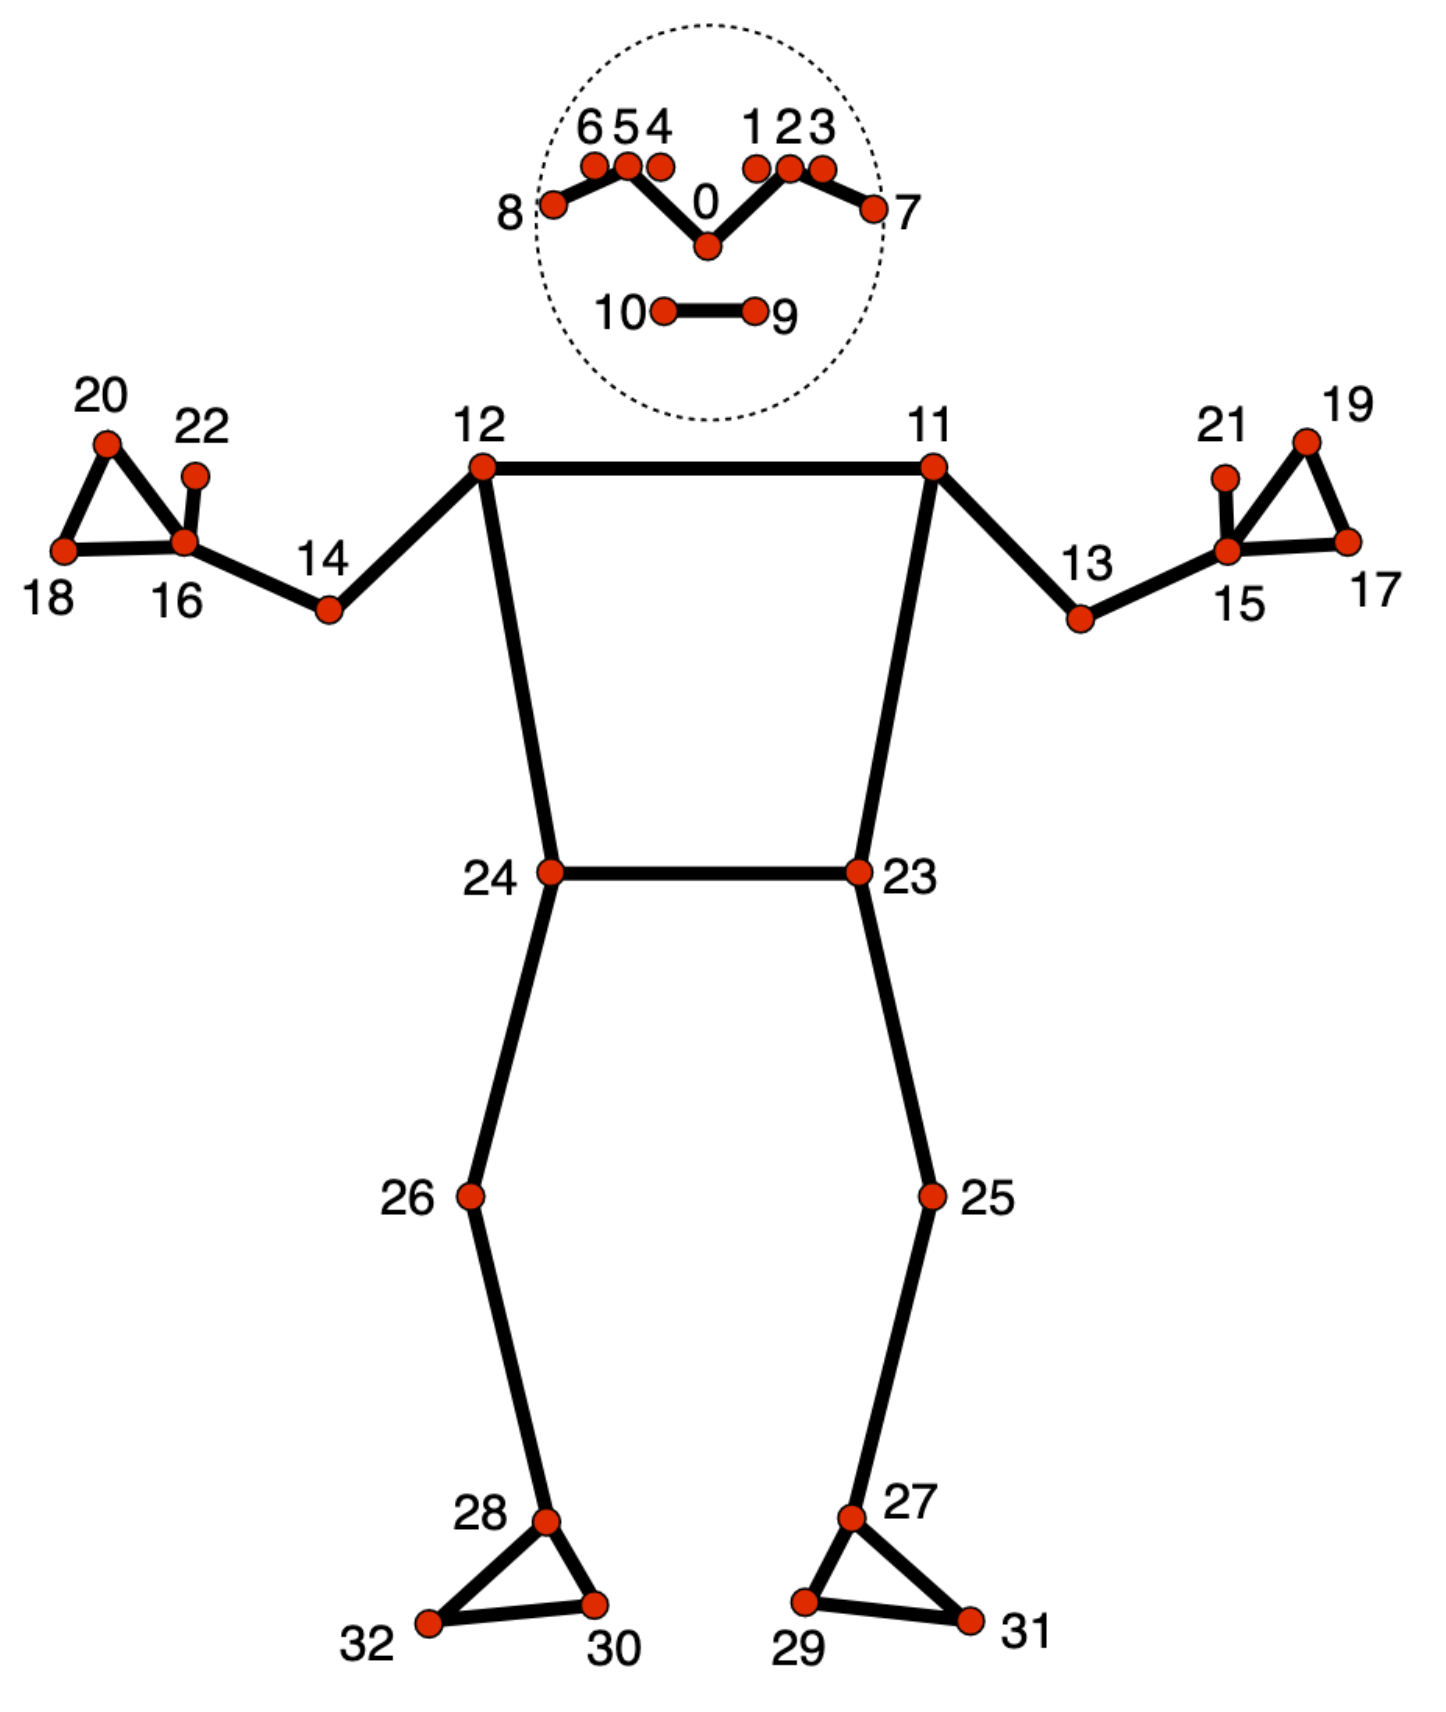

In [47]:
0 - nose
1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index

SyntaxError: invalid syntax (Temp/ipykernel_28780/2054172544.py, line 2)

In [48]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.5963315
y: 0.53340024
z: -0.22874801
visibility: 0.9998223

In [49]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.73053163
y: 0.90411276
z: -0.24452205
visibility: 0.94846034

In [50]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.83972657
y: 1.192485
z: -0.5396191
visibility: 0.7699831

In [7]:
# CALCULATE ANGLES

def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle
    

In [52]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

In [53]:
shoulder


[0.5963314771652222, 0.5334002375602722]

In [54]:
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

In [55]:
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [56]:
elbow

[0.730531632900238, 0.9041127562522888]

In [57]:
wrist

[0.8397265672683716, 1.192484974861145]

In [58]:
calculate_angles(shoulder,elbow,wrist)

179.160903080747

In [59]:
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

In [60]:
hip

[0.5704919099807739, 1.236726999282837]

In [61]:
calculate_angles(elbow,shoulder,hip)

22.004606921946188

In [62]:
# MAKE DETECTIONS

  
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened():
        ret, frame = cap.read()
        
        # DETECT STUFF AND RENDER
        q
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # GET COORDINATES
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            
            # CALCULATE THE ANGLE
            angle = calculate_angles(shoulder,elbow,wrist)
            
            # VISUALIZE ANGLE
            cv2.putText(image,str(angle),
                       tuple(np.multiply(elbow, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            
            
                confidence_sum = 0
      
            for id, landmark in enumerate(resultant.pose_landmarks.landmark):
                confidence_sum += landmark.visibility  # Sum visibility scores

            # After looping through all landmarks, calculate the average confidence
            average_confidence = confidence_sum / len(resultant.pose_landmarks.landmark)
            print(f"Average Confidence (Visibility) = {average_confidence:.4f}")  

    
    
            print(landmarks)
        except:
            pass
        
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



NameError: name 'q' is not defined

In [63]:
import winsound 
import time

In [36]:
# MAKE DETECTIONS

  
cap = cv2.VideoCapture(0)


# CURL COUNTER VARIABLES

counter = 0
stage = None
audio_duration = 2



with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened():
        ret, frame = cap.read()
        
        # DETECT STUFF AND RENDER
        
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # PLAY AUDIO ALERT
        
        def play_audio(filename,duration):
            try:
                winsound.PlaySound(filename, winsound.SND_FILENAME)
                time.sleep(duration)
            except OSError as e:
                print("AUDIO ERROR: {e}")
        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # GET COORDINATES
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            
            # CALCULATE THE ANGLE
            angle = calculate_angles(shoulder,elbow,wrist)
            
            # VISUALIZE ANGLE
            cv2.putText(image,str(angle),
                       tuple(np.multiply(elbow, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            
            if angle > 160:
#                 song = AudioSegment.from_mp3("E:/capstone/alert.mp3")
#                 play_audio("E:/capstone/alert.mp3",audio_duration)
                stage="down"
            if angle < 30 and stage =="down":
                stage="up"
                counter+=1
                print(counter)
#             print(landmarks)
        except:
            pass
        
        
        # RENDER CURL COUNTER
        # setup status box
        
        cv2.rectangle(image,(0,0), (255,73), (245,117,16), -1)
        
        # REP DATA
        
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        
         # STAGE DATA
        
        cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        confidence_sum = 0

        for id, landmark in enumerate(resultant.pose_landmarks.landmark):
            confidence_sum += landmark.visibility  # Sum visibility scores

        # After looping through all landmarks, calculate the average confidence
        average_confidence = confidence_sum / len(resultant.pose_landmarks.landmark)
        print(f"Average Confidence (Visibility) = {average_confidence:.4f}")  
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confiden

Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confiden

Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confiden

Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confidence (Visibility) = 0.9114
Average Confiden

In [59]:
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]


In [64]:
right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

# CALCULATE THE ANGLE
angle = calculate_angles(right_shoulder,left_shoulder,left_elbow)

In [65]:
angle

106.1928614025888

In [33]:
## SHOULDER PRESS


# MAKE DETECTIONS

  
cap = cv2.VideoCapture(0)


# CURL COUNTER VARIABLES

counter = 0
stage = None
audio_duration = 2



with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened():
        ret, frame = cap.read()
        
        
        width = 1200
        height = 880
        dim = (width, height)

        frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
        # DETECT STUFF AND RENDER
        
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # PLAY AUDIO ALERT
        
        def play_audio(filename,duration):
            try:
                winsound.PlaySound(filename, winsound.SND_FILENAME)
                time.sleep(duration)
            except OSError as e:
                print("AUDIO ERROR: {e}")
        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # GET COORDINATES
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            
            # CALCULATE THE ANGLE
            angle = calculate_angles(right_shoulder,right_elbow,right_wrist)
            angle2 = calculate_angles(left_shoulder,left_elbow,left_wrist)
            
            
            # VISUALIZE ANGLE
            cv2.putText(image,str(angle),
                       tuple(np.multiply(right_elbow, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(angle2),
                       tuple(np.multiply(left_elbow, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            
            if angle > 160 and angle2 < 110:
#                 song = AudioSegment.from_mp3("E:/capstone/alert.mp3")
#                 play_audio("E:/capstone/alert.mp3",audio_duration)
                stage="down"
            if angle < 110 and angle2 > 150:
                if stage == "down":
                    stage="up"
                    counter+=1
                    print(counter)
#             print(landmarks)
        except:
            pass
        
        
        # RENDER CURL COUNTER
        # setup status box
        
#         cv2.rectangle(image,(0,0), (255,73), (245,117,16), -1)
        
        # REP DATA
        
#         cv2.putText(image, 'REPS', (15,12),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, str(counter),
#                    (10,60),
#                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        
         # STAGE DATA
        
#         cv2.putText(image, 'STAGE', (65,12),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, stage,
#                    (60,60),
#                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    cap.release()
    cv2.destroyAllWindows()



1
